In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt

from obspy.signal.filter import bandpass
#from noisepy.monitoring.attenuation_utils import *
from noisepy.monitoring.monitoring_utils import *
from noisepy.seis.noise_module import mad
from noisepy.seis.io.asdfstore import ASDFStackStore

from attenuation_utils_mulwin import *
# from datetimerange import DateTimeRange
# from datetime import datetime, timezone



/home/kffeng/NoisePy/src/noisepy/seis/io/utils.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
path='STACKs_all/'
ref_store = ASDFStackStore(path)

path='STACKs/'
scf_store = ASDFStackStore(path)

In [3]:
pairs = ref_store.get_station_pairs()
print(f"Found {len(pairs)} station pairs")
print('pairs: ',pairs)

stations = set(pair[0] for pair in pairs)
print('Stations: ', stations)

src = stations.pop()
rec = src

print('src: ', src) 
print('rec: ', rec)

Found 1 station pairs
pairs:  [(CI.LJR, CI.LJR)]
Stations:  {CI.LJR}
src:  CI.LJR
rec:  CI.LJR


ref_span:  [2016-01-01T00:00:00+0000 - 2022-12-31T00:00:00+0000]
maxlag: 60 ; delta: 0.05 ; npts: 2401 ; ncmp: 6
skip EE
skip NN
skip ZZ


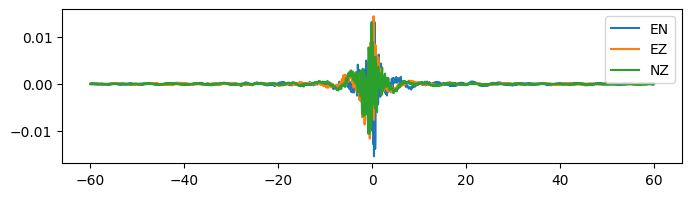

In [4]:
ref_span = ref_store.get_timespans(src, rec)
print('ref_span: ', ref_span)
wave_temp=ref_store.read(ref_span[0], src, rec)

maxlag, delta = wave_temp[0].parameters['maxlag'], wave_temp[0].parameters['dt']
npts = wave_temp[0].data.size
ncmp=len(ref_store.read(ref_span[0], src, rec))
samp_freq=1/delta

print(f'maxlag: {maxlag} ; delta: {delta} ; npts: {npts} ; ncmp: {ncmp}')


enz_system = ["EN","EZ","NZ"]
num_cmp=len(enz_system)
ref_wave=np.zeros((num_cmp, npts))
k=0
for i in range(ncmp):
    if (wave_temp[i].component == 'ZZ'):
        print(f'skip {wave_temp[i].component}')
        continue
    elif (wave_temp[i].component == 'NN'):
        print(f'skip {wave_temp[i].component}')
        continue 
    elif (wave_temp[i].component == 'EE'):
        print(f'skip {wave_temp[i].component}')
        continue
    else:
        ref_wave[k]=wave_temp[i].data
        k=k+1
ref_tvec = np.arange(npts)*delta - maxlag

plt.figure(figsize=(8,2))
plt.plot(ref_tvec,ref_wave[0],label='EN')
plt.plot(ref_tvec,ref_wave[1],label='EZ')
plt.plot(ref_tvec,ref_wave[2],label='NZ')
plt.legend(loc='upper right')
plt.show()

In [5]:
scf_span = scf_store.get_timespans(src, rec)
print('scf_span: ', scf_span)
print(f'Length of scf_span: {len(scf_span)}')
nev=len(scf_span)

ev=[]
scf_tvec = ref_tvec.copy()
scf_wave=np.zeros((len(scf_span), num_cmp, npts))
for tn in range(len(scf_span)):
    #ev.append(scf_span[tn])
    wave_temp=scf_store.read(scf_span[tn], src, rec)
    print(f'tn {tn}; timespan: {scf_span[tn]}; wave_temp: {wave_temp}')
    k=0
    for i in range(ncmp):
        if (wave_temp[i].component == 'ZZ'):
            print(f'skip {wave_temp[i].component}')
            continue
        elif (wave_temp[i].component == 'NN'):
            print(f'skip {wave_temp[i].component}')
            continue 
        elif (wave_temp[i].component == 'EE'):
            print(f'skip {wave_temp[i].component}')
            continue
        else:
            scf_wave[tn, k]=wave_temp[i].data
            k=k+1
    # plt.figure(figsize=(8,2))
    # plt.plot(scf_tvec,scf_wave[tn, 0],label='EN')
    # plt.plot(scf_tvec,scf_wave[tn, 1],label='EZ')
    # plt.plot(scf_tvec,scf_wave[tn, 2],label='NZ')
    # plt.legend(loc='upper right')
        

scf_span:  [2015-12-16T00:00:00+0000 - 2016-02-14T00:00:00+0000, 2016-01-16T00:00:00+0000 - 2016-03-16T00:00:00+0000, 2016-02-14T00:00:00+0000 - 2016-04-14T00:00:00+0000, 2016-03-16T00:00:00+0000 - 2016-05-15T00:00:00+0000, 2016-04-15T00:00:00+0000 - 2016-06-14T00:00:00+0000, 2016-05-16T00:00:00+0000 - 2016-07-15T00:00:00+0000, 2016-06-15T00:00:00+0000 - 2016-08-14T00:00:00+0000, 2016-07-16T00:00:00+0000 - 2016-09-14T00:00:00+0000, 2016-08-16T00:00:00+0000 - 2016-10-15T00:00:00+0000, 2016-09-15T00:00:00+0000 - 2016-11-14T00:00:00+0000, 2016-10-16T00:00:00+0000 - 2016-12-15T00:00:00+0000, 2016-11-15T00:00:00+0000 - 2017-01-14T00:00:00+0000, 2016-12-16T00:00:00+0000 - 2017-02-14T00:00:00+0000, 2017-01-16T00:00:00+0000 - 2017-03-17T00:00:00+0000, 2017-02-13T00:00:00+0000 - 2017-04-14T00:00:00+0000, 2017-03-16T00:00:00+0000 - 2017-05-15T00:00:00+0000, 2017-04-15T00:00:00+0000 - 2017-06-14T00:00:00+0000, 2017-05-16T00:00:00+0000 - 2017-07-15T00:00:00+0000, 2017-06-15T00:00:00+0000 - 2017-08

In [6]:
lag=maxlag
print(f"Lag-time: {lag}, total data length in points: {npts}")

fmin, fmax = 2,4
freq=[fmin,fmax]


Lag-time: 60, total data length in points: 2401


In [7]:
# %%
vdist=np.zeros((2,1))  # S-R distance array
bpuu=np.zeros((nev, num_cmp, npts))
bpref=np.zeros((num_cmp, npts))


In [8]:
# filter data
ev=[]
for nfile in range(nev):
    for ncmp, ccomp in enumerate(enz_system):
        sdata=scf_wave[nfile, ncmp]
        print(f'Filtering {ccomp} component of event {nfile}')
        bpuu[nfile, ncmp] = bandpass(sdata, fmin, fmax, int(1 / delta), corners=4, zerophase=True)
        bpuu[nfile, ncmp] = bpuu[nfile, ncmp]/np.max(np.abs(bpuu[nfile, ncmp]))

# filter reference data
for ncmp, ccomp in enumerate(enz_system):
    sdata=ref_wave[ncmp]
    bpref[ncmp] = bandpass(sdata, fmin, fmax, int(1 / delta), corners=4, zerophase=True)
    bpref[ncmp] = bpref[ncmp]/np.max(np.abs(bpref[ncmp]))  
print('Filtering done')
print()

Filtering EN component of event 0
Filtering EZ component of event 0
Filtering NZ component of event 0
Filtering EN component of event 1
Filtering EZ component of event 1
Filtering NZ component of event 1
Filtering EN component of event 2
Filtering EZ component of event 2
Filtering NZ component of event 2
Filtering EN component of event 3
Filtering EZ component of event 3
Filtering NZ component of event 3
Filtering EN component of event 4
Filtering EZ component of event 4
Filtering NZ component of event 4
Filtering EN component of event 5
Filtering EZ component of event 5
Filtering NZ component of event 5
Filtering EN component of event 6
Filtering EZ component of event 6
Filtering NZ component of event 6
Filtering EN component of event 7
Filtering EZ component of event 7
Filtering NZ component of event 7
Filtering EN component of event 8
Filtering EZ component of event 8
Filtering NZ component of event 8
Filtering EN component of event 9
Filtering EZ component of event 9
Filtering NZ c

Filtering EN component of event 11
Filtering EZ component of event 11
Filtering NZ component of event 11
Filtering EN component of event 12
Filtering EZ component of event 12
Filtering NZ component of event 12
Filtering EN component of event 13
Filtering EZ component of event 13
Filtering NZ component of event 13
Filtering EN component of event 14
Filtering EZ component of event 14
Filtering NZ component of event 14
Filtering EN component of event 15
Filtering EZ component of event 15
Filtering NZ component of event 15
Filtering EN component of event 16
Filtering EZ component of event 16
Filtering NZ component of event 16
Filtering EN component of event 17
Filtering EZ component of event 17
Filtering NZ component of event 17
Filtering EN component of event 18
Filtering EZ component of event 18
Filtering NZ component of event 18
Filtering EN component of event 19
Filtering EZ component of event 19
Filtering NZ component of event 19
Filtering EN component of event 20
Filtering EZ compone

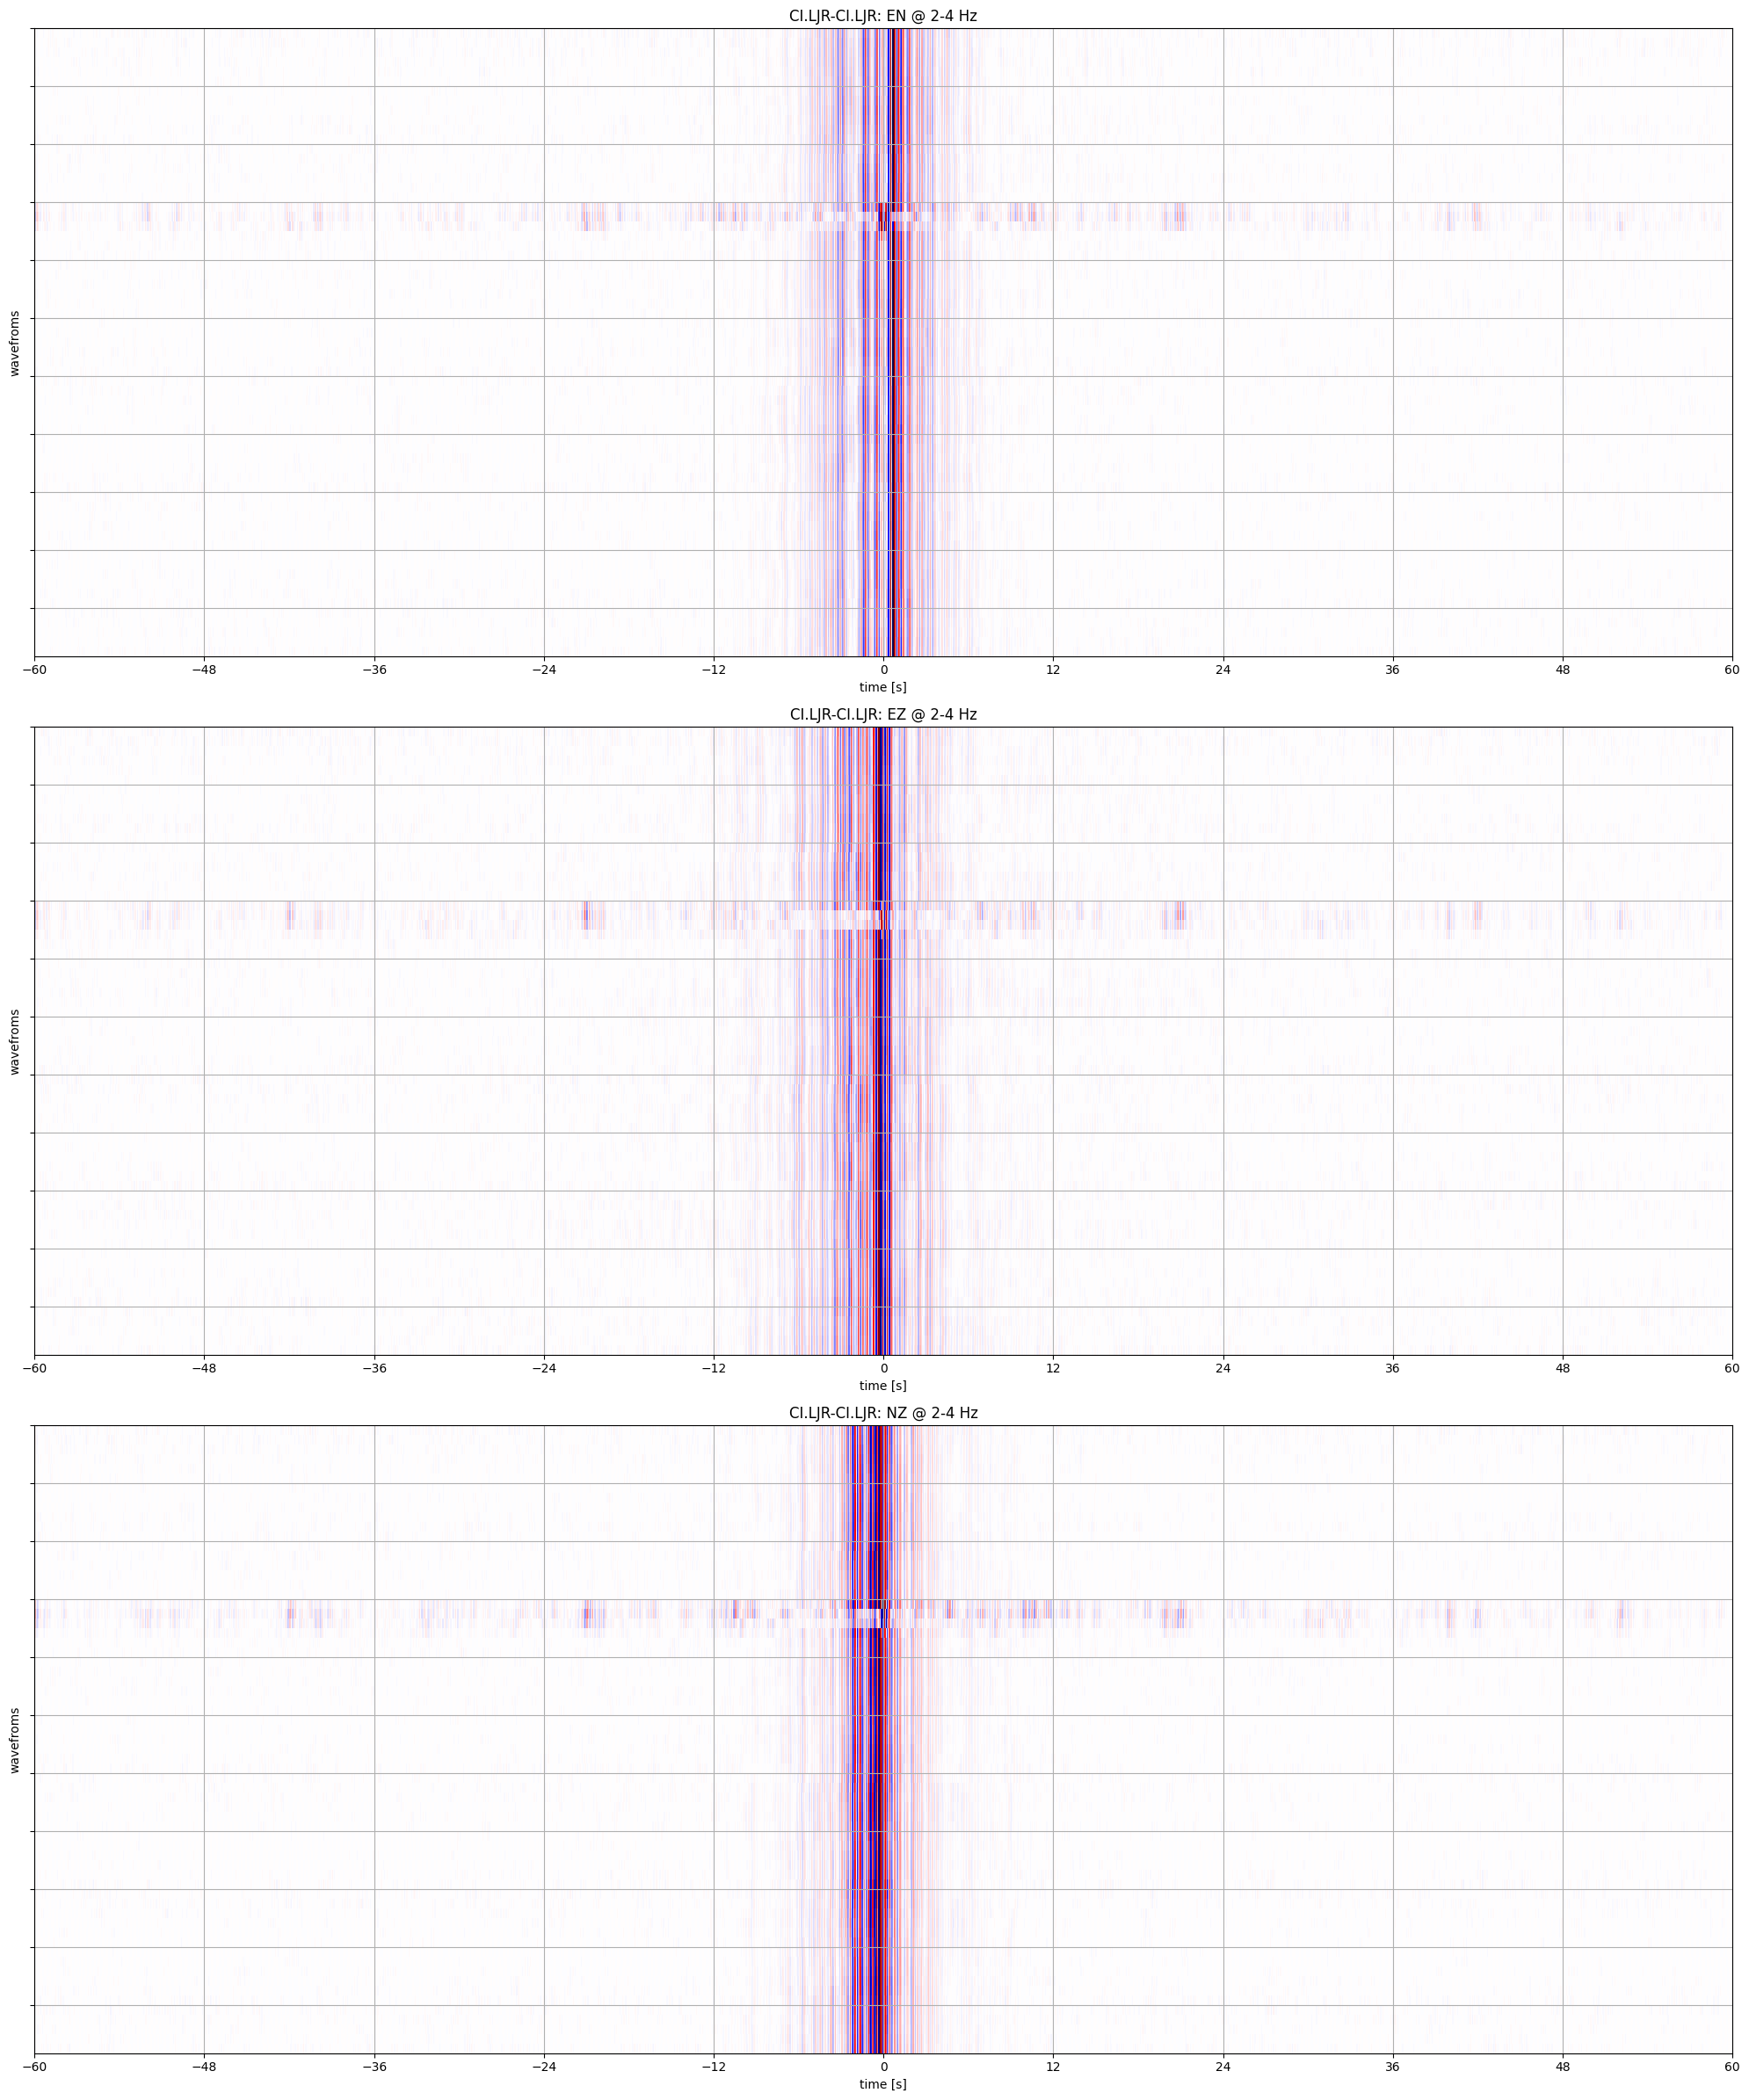

In [9]:
tick_inc=6
t = np.arange(-int(lag), int(lag) + delta, step=int(2 * int(lag) / 10))


fig, ax = plt.subplots(3,1, figsize=(20, 24), sharex=True)
for ncmp, ccomp in enumerate(enz_system):
    cax = ax[ncmp].matshow(bpuu[:, ncmp], cmap="seismic", extent=[-lag, lag, nev , 0], aspect="auto",vmin=-1, vmax=1)
    ax[ncmp].set_title(f"{src}-{rec}: {ccomp} @ {fmin}-{fmax} Hz")
    fig.colorbar = (cax, ax[ncmp].images)
    
    ax[ncmp].set_xlabel("time [s]")
    ax[ncmp].set_ylabel("wavefroms")
    ax[ncmp].set_xticks(t)
    ax[ncmp].set_yticks(np.arange(0, nev, step=tick_inc))
    ax[ncmp].set_yticklabels((ev[0:nev:tick_inc]))
    ax[ncmp].xaxis.set_ticks_position("bottom")
    ax[ncmp].grid(True)
    
plt.tight_layout()
plt.show()

#outfname=f"{netst}_stack_{cctype}_{fmin}-{fmax}Hz.png"
#fig.savefig(outfname, format="png", dpi=200)
#plt.close()

tick_inc=6
t = np.arange(-int(lag), int(lag) + delta, step=1)

fig, ax = plt.subplots(3,1, figsize=(20, 24), sharex=True)
for ncmp, ccomp in enumerate(enz_system):
    cax = ax[ncmp].matshow(bpuu[:, ncmp], cmap="seismic", extent=[-lag, lag, nev , 0], aspect="auto",vmin=-1/2, vmax=1/2)
    ax[ncmp].set_title(f"{src}-{rec}:  {ccomp} @ {fmin}-{fmax} Hz")
    fig.colorbar = (cax, ax[ncmp].images)
    
    ax[ncmp].set_xlabel("time [s]")
    ax[ncmp].set_ylabel("wavefroms")
    ax[ncmp].set_xticks(t)
    ax[ncmp].set_yticks(np.arange(0, nev, step=tick_inc))
    ax[ncmp].set_yticklabels((ev[0:nev:tick_inc]))
    ax[ncmp].xaxis.set_ticks_position("bottom")
    ax[ncmp].grid(True)
    ax[ncmp].set_xlim(-20,20)

plt.tight_layout()
plt.show()

#outfname=f"{netst}_stack_{cctype}_{fmin}-{fmax}Hz.png"
#fig.savefig(outfname, format="png", dpi=200)
#plt.close()

In [10]:
# slide window for cc
#from scipy.signal import hilbert

window_len=1/fmin*6
print("window length (sec)", window_len)
# Parameters
window_size = int(window_len / delta)  # Size of the moving window
print("window size (npts)", window_size)

nstep=window_size//10
window_num = (len(bpref[ncmp]) - window_size)//nstep + 1
print("window number", window_num)


ccmatrix=np.zeros((num_cmp, nev, window_num))
for ncmp, comp in enumerate(enz_system):
    print("Component: ", comp)
    
    tvec=ref_tvec    
    time_series = bpref[ncmp]
    time_series = time_series - np.mean(time_series)
    envelopes = time_series**2
    print("data length", len(time_series))
    
    for tn in range(nev):
        time_series2 = bpuu[tn, ncmp]
        time_series2 = time_series2 - np.mean(time_series2)
        envelopes2 = time_series2**2
        
        # fig, ax= plt.subplots(2, figsize=(20, 4))
        # ax[0].set_title(f"{comp} @ {fmin}-{fmax} Hz")
        # ax[0].plot(tvec, time_series ,label=ref_span[0])
        # ax[0].plot(tvec, time_series2, ls='--',  alpha=0.5, label=scf_span[tn])
        # ax[1].plot(tvec, envelopes)
        # ax[1].plot(tvec, envelopes2, ls='--', alpha=0.5)
        # ax[1].set_yscale("log")
        # ax[1].set_ylim(1e-6,10)
        # ax[1].set_xlim(-lag,lag)
        # ax[0].set_xlim(-lag,lag)
        # ax[0].legend()


        # Compute moving window cross-correlation
        correlations = []
        for i in np.arange(0, len(time_series)-window_size, nstep):
            # Extract segments of the time series
            segment1 = time_series[i :i+window_size]
            segment2 = time_series2[i :i+window_size]
            # Compute cross-correlation
            cross_corr = np.corrcoef(segment1, segment2)[0,1]
            #print(f'window {i} {i} {i+window_size}, {cross_corr:.2f}')
            correlations.append(cross_corr)
        
        ccmatrix[ncmp, tn]=correlations
        
        # plt.figure(figsize=(20, 2))
        # plt.ylim(0,1)
        # plt.plot(correlations, label='value')
        # plt.plot(np.abs(correlations),'--', label='abs value')
        # plt.xlim(0, window_num)
        # plt.xlabel('window (i)')
        # plt.ylabel('Average Cross-correlation')
        # plt.title('Average Cross-correlation Across Segments2')
        # plt.legend()
        # plt.grid(True)
        # plt.show()


window length (sec) 3.0
window size (npts) 60
window number 391
Component:  EN
data length 2401
Component:  EZ
data length 2401
Component:  NZ
data length 2401


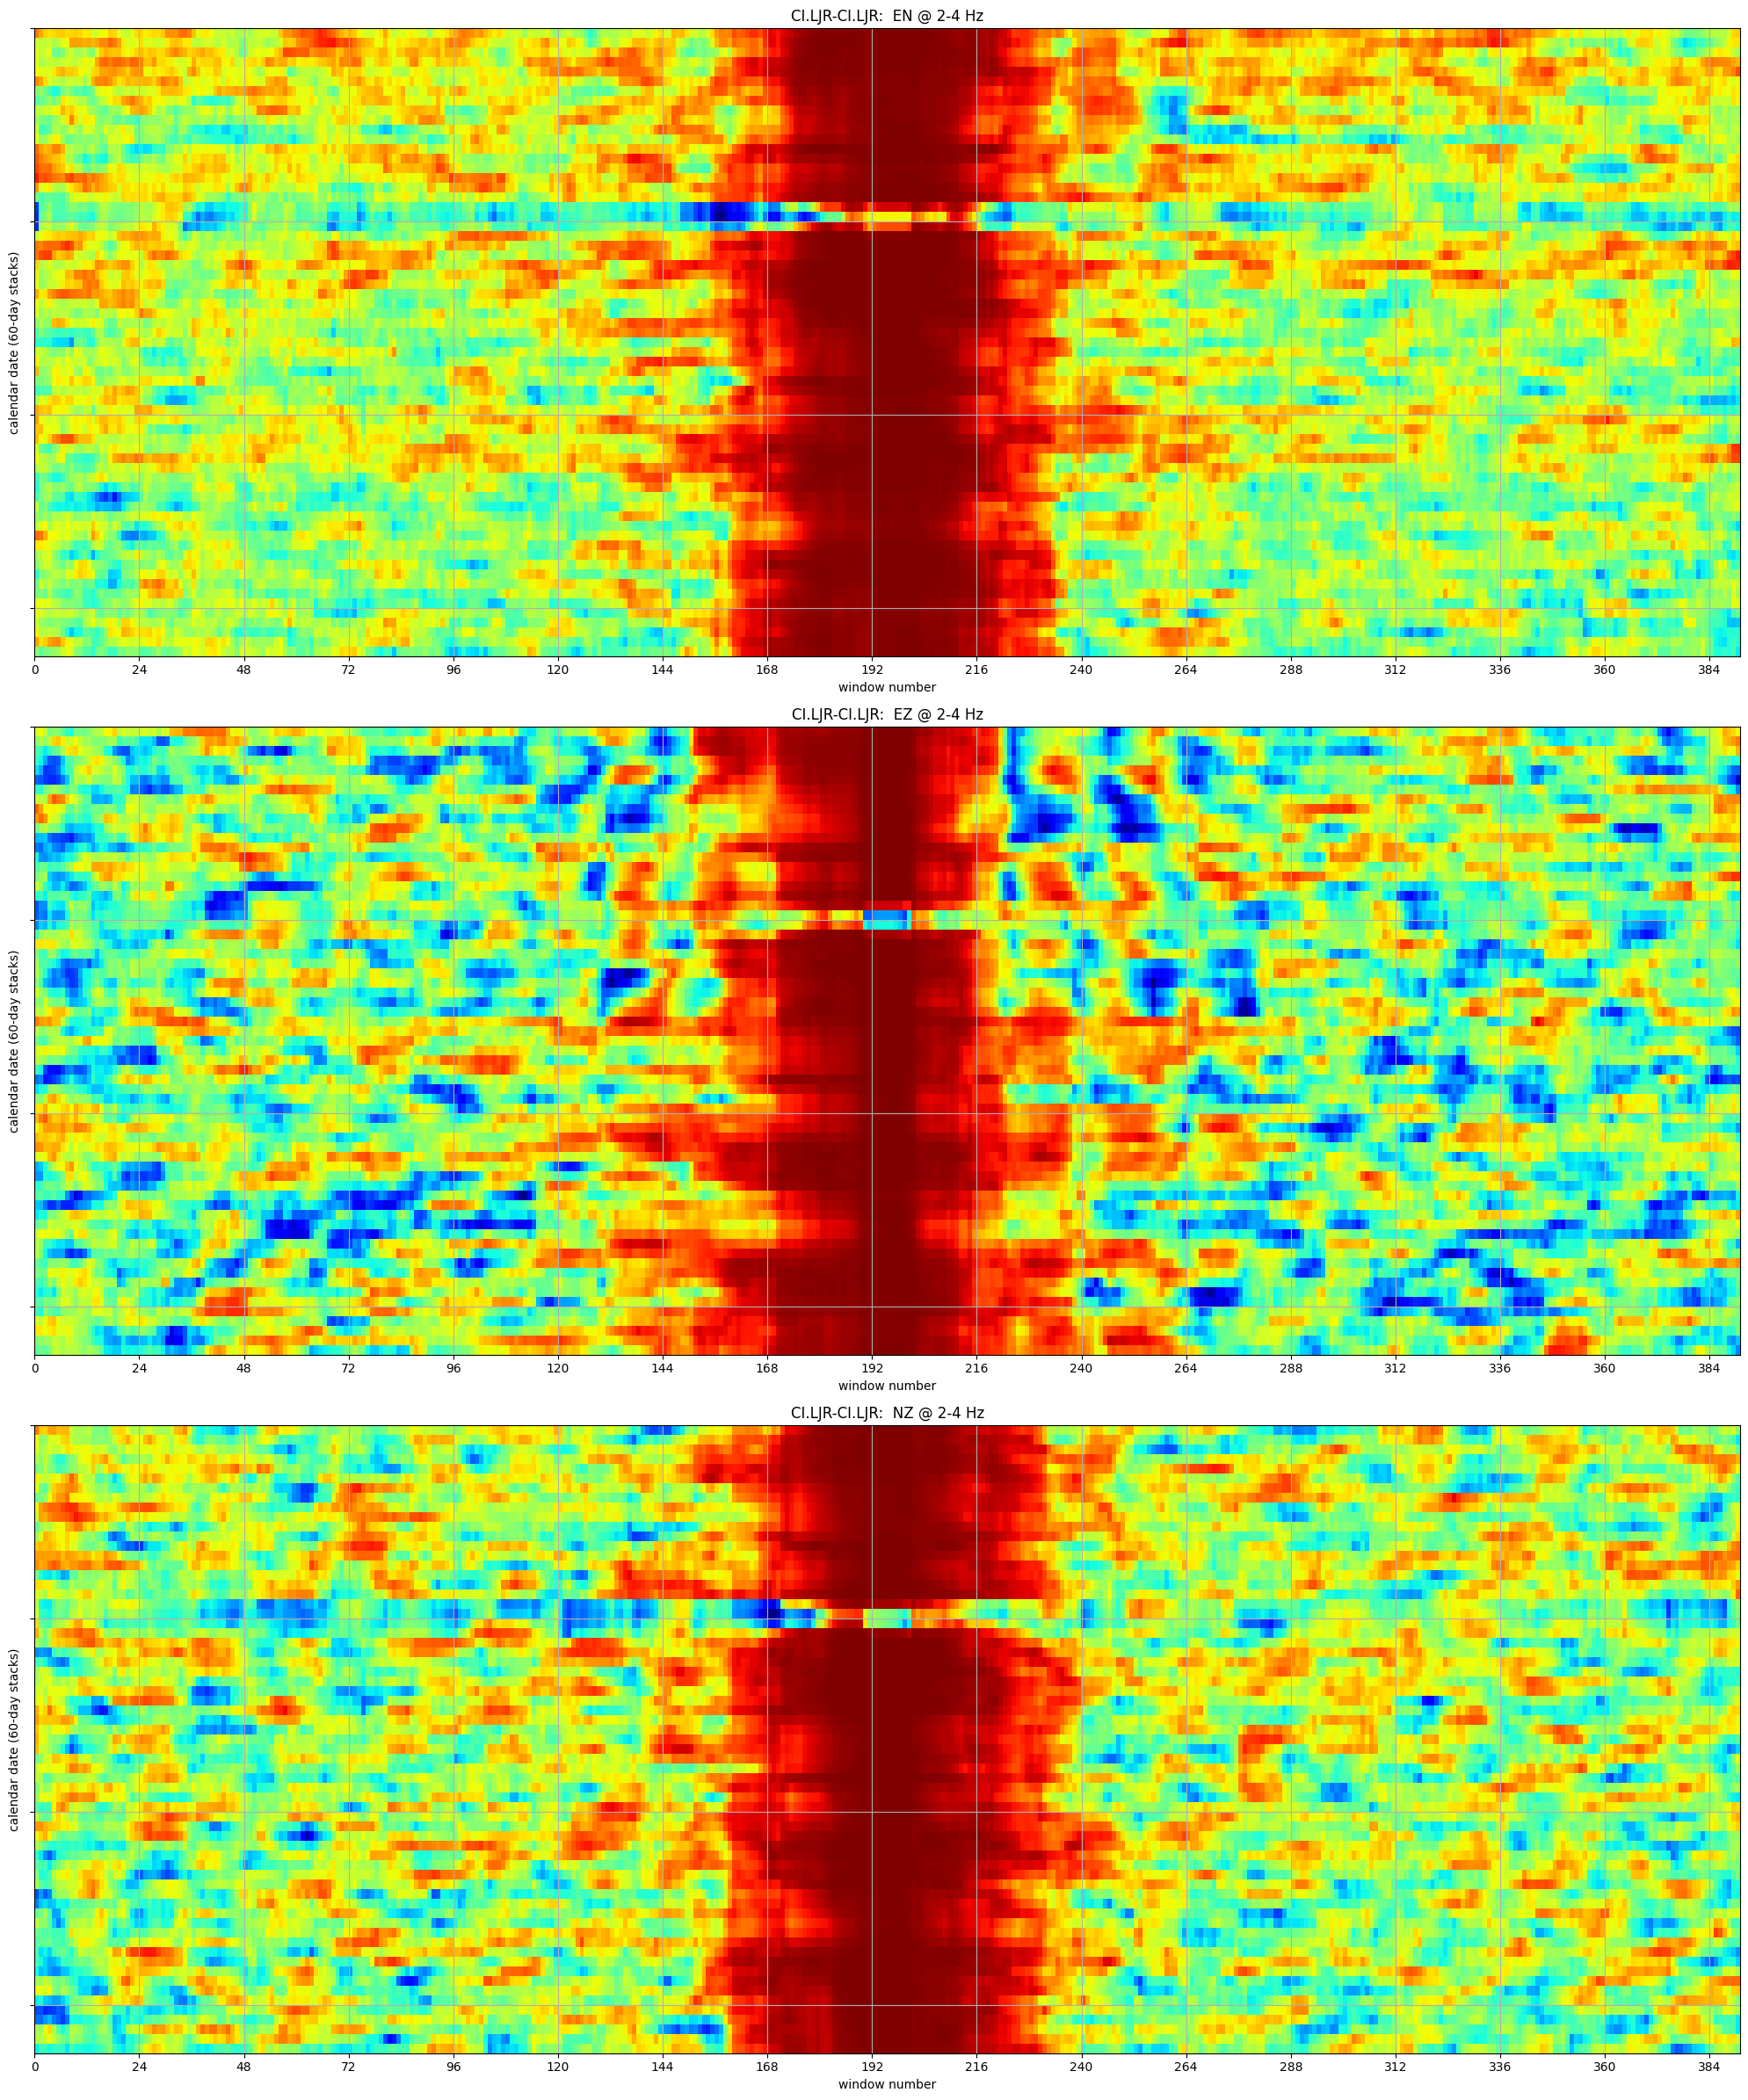

In [11]:
tick_inc=20
t = np.arange(0, window_num, nstep*4)

fig, ax = plt.subplots(3,1, figsize=(20, 24), sharex=True)
for ncmp, ccomp in enumerate(enz_system):
    cax = ax[ncmp].matshow(ccmatrix[ncmp], cmap="jet", extent=[0, window_num, nev , 0], aspect="auto",)
    ax[ncmp].set_title(f"{src}-{rec}:  {ccomp} @ {fmin}-{fmax} Hz")
    fig.colorbar = (cax, ax[ncmp].images)
    
    ax[ncmp].set_xlabel("window number")
    ax[ncmp].set_ylabel("calendar date (60-day stacks)")
    ax[ncmp].set_xticks(t)
    ax[ncmp].set_yticks(np.arange(0, nev, step=tick_inc))
    ax[ncmp].set_yticklabels((ev[0:nev:tick_inc]))
    ax[ncmp].xaxis.set_ticks_position("bottom")
    ax[ncmp].grid(True)


plt.tight_layout()
plt.show()

#outfname=f"{netst}_stack_{cctype}_{fmin}-{fmax}Hz.png"
#fig.savefig(outfname, format="png", dpi=200)
#plt.close()

In [12]:
print(ccmatrix.shape)
print(bpref.shape)
print(bpuu.shape)
correspond_tlag = ((np.where(ccmatrix[0,0,:])[0] * (nstep)) * delta + window_len/2) - lag
print(f'window size: {window_size} (npt); sliding step: {nstep} (npt);\ncorrespond_tlag: {correspond_tlag}')


print(type(correspond_tlag))

(3, 65, 391)
(3, 2401)
(65, 3, 2401)
window size: 60 (npt); sliding step: 6 (npt);
correspond_tlag: [-58.5 -58.2 -57.9 -57.6 -57.3 -57.  -56.7 -56.4 -56.1 -55.8 -55.5 -55.2
 -54.9 -54.6 -54.3 -54.  -53.7 -53.4 -53.1 -52.8 -52.5 -52.2 -51.9 -51.6
 -51.3 -51.  -50.7 -50.4 -50.1 -49.8 -49.5 -49.2 -48.9 -48.6 -48.3 -48.
 -47.7 -47.4 -47.1 -46.8 -46.5 -46.2 -45.9 -45.6 -45.3 -45.  -44.7 -44.4
 -44.1 -43.8 -43.5 -43.2 -42.9 -42.6 -42.3 -42.  -41.7 -41.4 -41.1 -40.8
 -40.5 -40.2 -39.9 -39.6 -39.3 -39.  -38.7 -38.4 -38.1 -37.8 -37.5 -37.2
 -36.9 -36.6 -36.3 -36.  -35.7 -35.4 -35.1 -34.8 -34.5 -34.2 -33.9 -33.6
 -33.3 -33.  -32.7 -32.4 -32.1 -31.8 -31.5 -31.2 -30.9 -30.6 -30.3 -30.
 -29.7 -29.4 -29.1 -28.8 -28.5 -28.2 -27.9 -27.6 -27.3 -27.  -26.7 -26.4
 -26.1 -25.8 -25.5 -25.2 -24.9 -24.6 -24.3 -24.  -23.7 -23.4 -23.1 -22.8
 -22.5 -22.2 -21.9 -21.6 -21.3 -21.  -20.7 -20.4 -20.1 -19.8 -19.5 -19.2
 -18.9 -18.6 -18.3 -18.  -17.7 -17.4 -17.1 -16.8 -16.5 -16.2 -15.9 -15.6
 -15.3 -15.  -14.7 -14.4 -

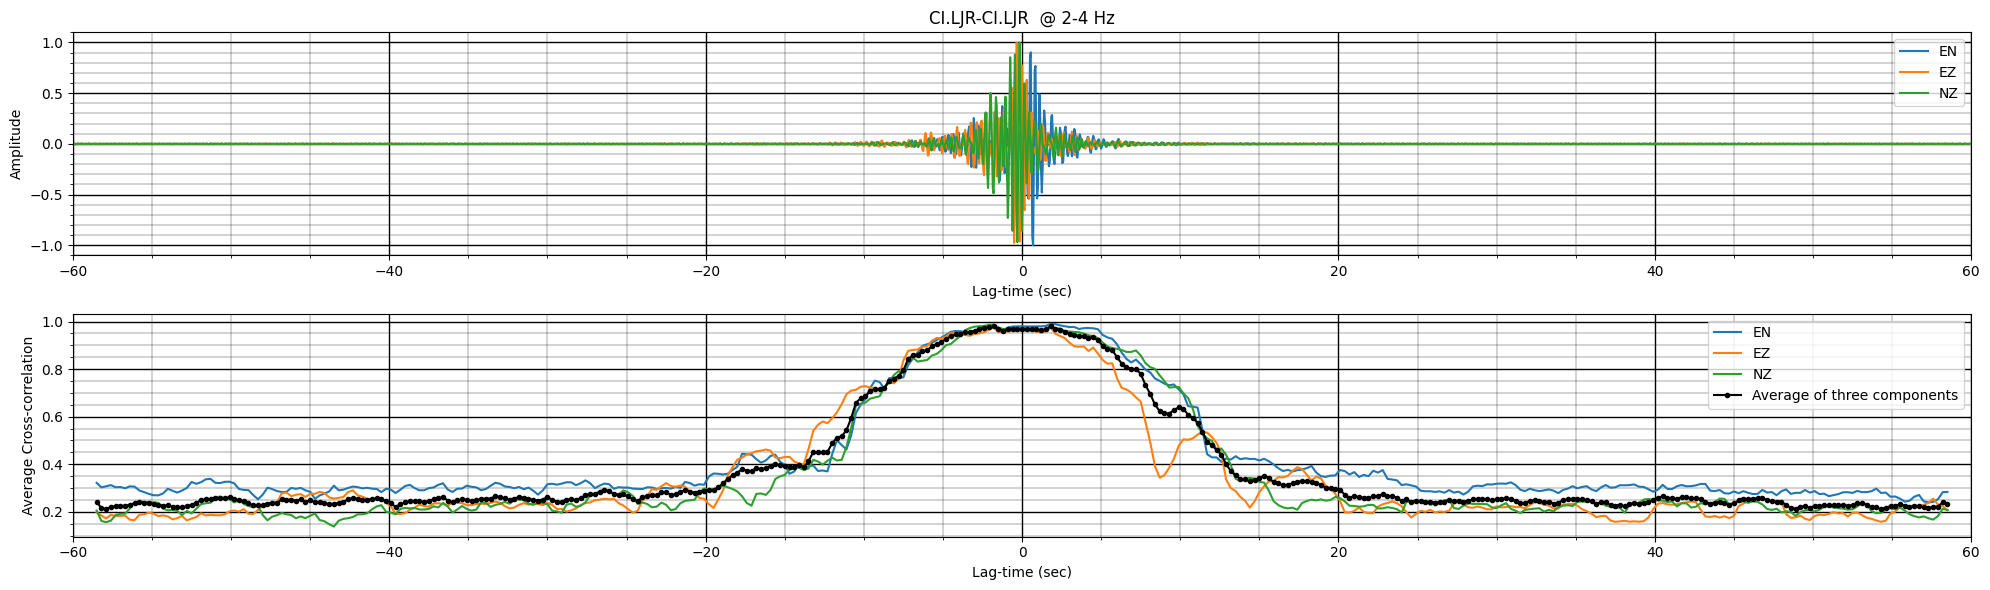

In [13]:
import matplotlib as mpl
fig,ax = plt.subplots(2,figsize=(20, 6))

mean_ccmatrix=np.zeros((num_cmp, window_num))
for ncmp, ccomp in enumerate(enz_system):
    mean_ccmatrix[ncmp]=np.mean(ccmatrix[ncmp], axis=0)
    ax[0].plot(ref_tvec, bpref[ncmp], label=ccomp)
    ax[1].plot(correspond_tlag, mean_ccmatrix[ncmp], label=ccomp)
ax[1].plot(correspond_tlag, np.mean(mean_ccmatrix[:], axis=0) , label='Average of three components', color='k',marker='.', )    

ax[0].set_title(f"{src}-{rec}  @ {fmin}-{fmax} Hz")

ax[0].set_ylabel('Amplitude')  
ax[1].set_ylabel('Average Cross-correlation')

for k in range(2):
    ax[k].set_xlim(ref_tvec[0], ref_tvec[-1])
    ax[k].set_xlabel('Lag-time (sec)')
    ax[k].grid(True)
    ax[k].legend(loc='upper right')
    ax[k].get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax[k].get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax[k].grid( which='major', color='k', linewidth=1.0)
    ax[k].grid( which='minor', color='k', linewidth=0.25)
plt.tight_layout()


In [14]:
def fold_arr(cc):
    folded_cc = []
    n = len(cc) // 2  # Assuming cc length is 121, n = 60

    for i in range(n + 1):  # Iterate from 0 to 60
        folded_value = (cc[n + i] + cc[n - i]) / 2  # Average of cc[lag] and cc[-lag]
        folded_cc.append(folded_value)

    return folded_cc


def find_index_below_threshold(arr, threshold=0.8):
    for i, value in enumerate(arr):
        if value < threshold:
            return i
    return None  # If no value below threshold is found


In [15]:
cc_thred = 0.8
fold_cc=fold_arr(np.mean(mean_ccmatrix[:], axis=0))
index = find_index_below_threshold(fold_cc, cc_thred)
print(index, fold_cc[index])
coda_tbeg =  (1/fmin) * 3
coda_tend = correspond_tlag[len(fold_cc)-1+index]

25 0.7873648140607937


391 196


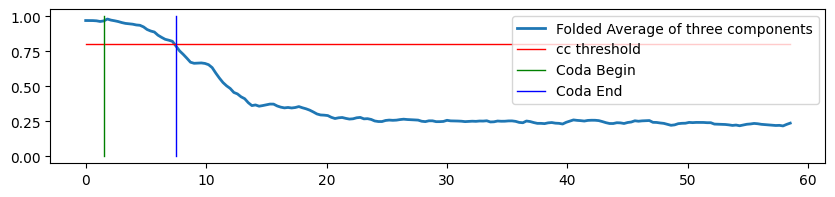

In [16]:
plt.figure(figsize=(10, 2))

print(len((np.mean(mean_ccmatrix[:], axis=0))),len(fold_cc))
plt.plot(correspond_tlag[len(fold_cc)-1:], fold_cc, label='Folded Average of three components', lw=2)
plt.plot([correspond_tlag[len(fold_cc)-1], correspond_tlag[-1]], [cc_thred, cc_thred] , label='cc threshold', color='r', lw=1 )
plt.plot([coda_tbeg, coda_tbeg], [0, 1] , label='Coda Begin', color='g', lw=1 )
plt.plot([coda_tend, coda_tend], [0, 1] , label='Coda End', color='b', lw=1 )
plt.legend(loc='upper right')

We got the coda window and the bandpass scfs and reference by the steps above. Now, we are calculating dv/v and attenuation based on these waveforms and parameters. Eventually, we save results into a pandas dataframe.

In [17]:
from noisepy.monitoring.monitoring_utils import *     # modules for monitoring utils
from noisepy.monitoring.monitoring_methods import stretching
#from noisepy.monitoring.attenuation_utils import *    # modules for attenuation monitoring
from noisepy.seis import noise_module


In [18]:
config_monito = ConfigParameters_monitoring() # default config parameters which can be customized

# --- parameters for measuring velocity changes ---
# pre-defined group velocity to window direct and code waves
config_monito.vmin = 2.0  # minimum velocity of the direct waves -> start of the coda window
config_monito.lwin = 10.0  # window length in sec for the coda waves

# basic parameters
config_monito.freq = [fmin, fmax]  # targeted frequency band for waveform monitoring
nfreq = len(config_monito.freq) - 1
config_monito.onelag = False  # make measurement one one lag or two
config_monito.norm_flag = True  # whether to normalize the cross-correlation waveforms
config_monito.do_stretch = True  # use strecthing method or not

# parameters for stretching method
config_monito.epsilon = 0.02  # limit for dv/v (in decimal)
config_monito.nbtrial = 100  # number of increment of dt [-epsilon,epsilon] for the streching

# coda window 
config_monito.coda_tbeg = coda_tbeg  # begin time (sec) of the coda window in lag time
config_monito.coda_tend = coda_tend  # end time (sec) of the coda window in lag time

# --- parameters for measuring attenuation ---
config_monito.smooth_winlen = (1/fmin)*2    # smoothing window length
config_monito.cvel = 2.6                    # Rayleigh wave velocities over the freqency bands
config_monito.atten_tbeg = coda_tbeg
config_monito.atten_tend = coda_tend
config_monito.intb_interval_base = 0.01 

In [19]:
timespans = scf_span
sta_pair = src, rec

In [20]:
import yaml
from noisepy.seis.io.datatypes import ConfigParameters,  StackMethod

def load_config(config_file):
    with open(config_file, 'r') as file:
        config = yaml.safe_load(file)
    return config

# load config of the stackstore data products
config =  ConfigParameters()
config_file = 'config.yml'
config = load_config(config_file)
print(config)


{'acorr_only': True, 'cc_len': 600, 'cc_method': 'xcorr', 'channels': ['HHE', 'HHN', 'HHZ', 'BHE', 'BHN', 'BHZ'], 'client_url_key': 'IRIS', 'correction': False, 'correction_csv': None, 'down_list': False, 'end_date': '2022-12-31T00:00:00Z', 'freq_norm': 'rma', 'freqmax': 10.0, 'freqmin': 0.08, 'inc_hours': 24, 'keep_substack': False, 'lamax': 42.0, 'lamin': 32.0, 'lomax': -114.0, 'lomin': -124.0, 'max_over_std': 10, 'maxlag': 60, 'ncomp': 3, 'net_list': ['CI'], 'respdir': None, 'rm_resp': False, 'rm_resp_out': 'VEL', 'rotation': True, 'samp_freq': 20.0, 'single_freq': False, 'smooth_N': 12000, 'smoothspect_N': 1, 'stack_method': 'linear', 'start_date': '2016-01-01T00:00:00Z', 'stations': ['DLA', 'LAF', 'LJR'], 'stations_file': None, 'stationxml': False, 'step': 600.0, 'storage_options': {}, 'substack': False, 'substack_len': 600, 'time_norm': 'one_bit', 'xcorr_only': False}


In [21]:
# calculate the number of segments
num_chunk = len(timespans)

npts_one_segmt = int(2 * maxlag * samp_freq) + 1
num_segmts = 1
print(f"there are ",num_segmts," segments/windows and ",npts_one_segmt," points in each segments and overall",num_chunk," number of time chunks")

there are  1  segments/windows and  2401  points in each segments and overall 65  number of time chunks


In [22]:
nccomp = num_cmp
cc_time  = np.zeros( (num_chunk * num_segmts), dtype=np.float32)
print(cc_time.shape)

(65,)


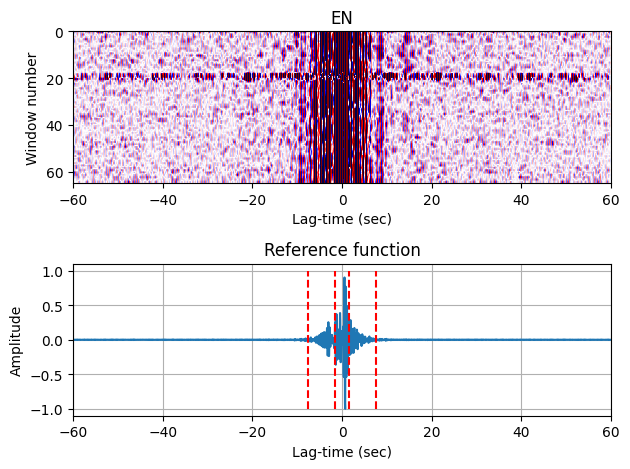

In [23]:
# in single-station cross-component case : enz_system = [ "EN", "EZ", "NZ"]
freq1=config_monito.freq[0]
freq2=config_monito.freq[1]
dt=1/samp_freq

## Choose a targeted component
comp = "EN"

## using the stackstore ref to replace the stacking here for long-term monitoring
tref=bpref[0]
tcur=bpuu[:,0,:]


# Plot
fig,ax=plt.subplots(2,1)
ax[0].imshow(tcur,extent=[-maxlag, maxlag, nev, 0], aspect='auto',vmin=-0.01,vmax=0.01, cmap='seismic')
ax[0].set_title(comp)
ax[0].set_xlabel('Lag-time (sec)')
ax[0].set_ylabel('Window number')

ax[1].set_xlim(-maxlag, maxlag);ax[1].grid(True)
ax[1].plot(ref_tvec, tref)
ax[1].set_title('Reference function')
ax[1].set_xlabel('Lag-time (sec)')
ax[1].set_ylabel('Amplitude')

ax[1].plot([coda_tbeg, coda_tbeg], [-1, 1], 'r--', label='Coda Begin')
ax[1].plot([-coda_tbeg, -coda_tbeg], [-1, 1], 'r--', label='Coda Begin')
ax[1].plot([coda_tend, coda_tend], [-1, 1], 'r--', label='Coda End')
ax[1].plot([-coda_tend, -coda_tend], [-1, 1], 'r--', label='Coda End')

plt.tight_layout()
plt.show()

In [24]:
# define the window index for positive and negative lag time
pwin_indx, nwin_indx = window_indx_def(npts_one_segmt, config_monito.coda_tbeg, config_monito.coda_tend, dt)

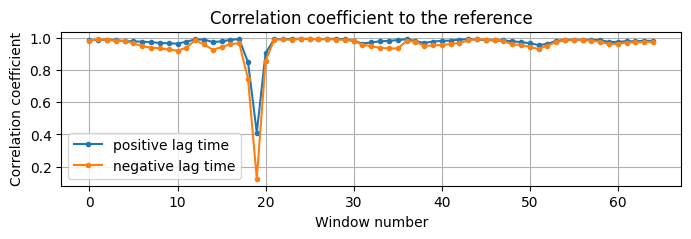

In [25]:
nwin=nev

# Calculate the correlation coefficient between the coda and the reference coda
pcor_cc = np.zeros(shape=(nwin), dtype=np.float32)
ncor_cc = np.zeros(shape=(nwin), dtype=np.float32)
for i in range(nwin):
  pcor_cc[i] = np.corrcoef(tref[pwin_indx], tcur[i, pwin_indx])[0, 1]
  ncor_cc[i] = np.corrcoef(tref[nwin_indx], tcur[i, nwin_indx])[0, 1]

# Plot
plt.figure(figsize=(8,2));plt.grid(True)
plt.plot(pcor_cc, '.-', label='positive lag time')
plt.plot(ncor_cc, '.-', label='negative lag time')
plt.title('Correlation coefficient to the reference')
plt.ylabel('Correlation coefficient')
plt.xlabel('Window number')
plt.legend()

In [26]:
# initializing arrays
dvv_stretch = np.zeros(shape=(nwin, 4), dtype=np.float32)

# define the parameters for stretching
para=dict()
para["t"] = np.arange(-maxlag, maxlag+dt,dt)
para["freq"] = [freq1, freq2]
para["twin"] = [config_monito.coda_tbeg, config_monito.coda_tend]
para["dt"] = dt

In [27]:
print( src, rec, nwin)
nccomp=len(enz_system)

# initializing arrays
all_dvv= np.zeros(shape=(nccomp, nwin), dtype=np.float32)
all_err= np.zeros(shape=(nccomp, nwin), dtype=np.float32)
results_dvv= np.zeros(shape=(nwin), dtype=np.float32)
results_err= np.zeros(shape=(nwin), dtype=np.float32)
   
for icomp in range(0,nccomp):
    comp = enz_system[icomp]   
    
    for ii in range(nwin):
        # casual and acasual lags for both ref and cur waveforms
        pcur = bpuu[ii, icomp , pwin_indx]
        ncur = bpuu[ii, icomp, nwin_indx]
        pref = bpref[icomp, pwin_indx]
        nref = bpref[icomp, nwin_indx]
        # functions working in time domain
        if config_monito.do_stretch:
            (
                dvv_stretch[ii, 0],
                dvv_stretch[ii, 1],
                cc,
                cdp,
            ) = stretching(pref, pcur, config_monito.epsilon, config_monito.nbtrial, para)
            (
                dvv_stretch[ii, 2],
                dvv_stretch[ii, 3],
                cc,
                cdp,
            ) = stretching(nref, ncur, config_monito.epsilon, config_monito.nbtrial, para)
    all_dvv[icomp]=(dvv_stretch[:, 0]+dvv_stretch[:, 2])/2.0
    all_err[icomp]=np.sqrt(dvv_stretch[:, 1]**2+dvv_stretch[:, 3]**2)
    print('component: ',comp,' completed. ')
    results_dvv+=all_dvv[icomp]
    results_err+=all_err[icomp]**2
results_dvv=results_dvv/nccomp
results_err=np.sqrt(results_err)
print(all_dvv.shape, results_dvv.shape, )
nwin=len(results_dvv)
            

CI.LJR CI.LJR 65
component:  EN  completed. 
component:  EZ  completed. 
component:  NZ  completed. 
(3, 65) (65,)


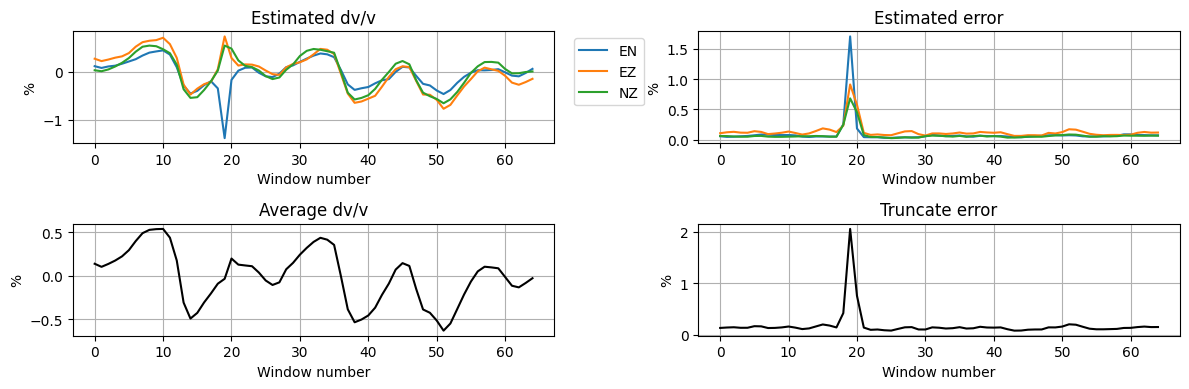

In [28]:
fig,ax=plt.subplots(2,2,figsize=(12,4))
ax[0,0].plot(all_dvv.T)
ax[0,0].legend(enz_system, loc='upper right', bbox_to_anchor=(1.2,1))
ax[0,0].grid(True)
ax[0,0].set_title('Estimated dv/v')
ax[0,0].set_xlabel('Window number')
ax[0,0].set_ylabel('%')

ax[0,1].plot(all_err.T);ax[0,1].grid(True);#ax[0,1].set_ylim(0,100)
ax[0,1].set_title('Estimated error')
ax[0,1].set_xlabel('Window number')
ax[0,1].set_ylabel('%')

ax[1,0].plot(results_dvv.T, 'k');ax[1,0].grid(True)
ax[1,0].set_title('Average dv/v')
ax[1,0].set_xlabel('Window number')
ax[1,0].set_ylabel('%')

ax[1,1].plot(results_err.T, 'k');ax[1,1].grid(True)
ax[1,1].set_title('Truncate error')
ax[1,1].set_xlabel('Window number')
ax[1,1].set_ylabel('%')

plt.tight_layout()

### Step 5: Measure attenuation parameter -- intrinsic absorption parameter b
Preparing mean-squared values in time seires for measuring intrinsic parameter. We follow these steps:
* Prepare smoothed mean-squared data (msv) in a given frequency band,
* Get the average msv (msv_mean) from all components, and also the symmetric msv (fmsv_mean)
* Measure intrinsic absorption parameter b (results_intb) and transfer it to intrinsic Q (Qi)

temp1: (65, 2401), msv (3, 65, 2401), msv_temp (65, 2401)


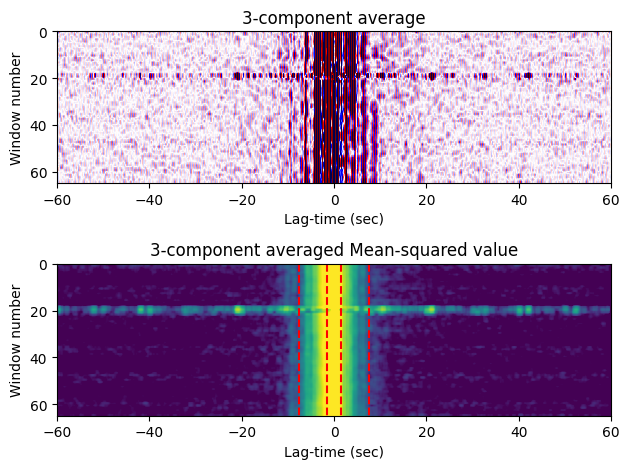

In [29]:
from matplotlib.colors import LogNorm
#enz_system = ["EN", "EZ", "NZ"]
nccomp=len(enz_system)
winlen=config_monito.smooth_winlen

# Restore calendar time from cc_time array 
win_time=[]

# initializing arrays 
tcur_temp1 = np.zeros(shape=(nev, npts_one_segmt))
msv=np.zeros((nccomp, nev, npts_one_segmt))
msv_temp=np.zeros((nev, npts_one_segmt))
print(f'temp1: {tcur_temp1.shape}, msv {msv.shape}, msv_temp {msv_temp.shape}')

# get all components average
for icomp in range(0,nccomp):
    comp = enz_system[icomp]
    
    # bandpass filter the data.
    tcur_temp2 = np.zeros(shape=(nev, npts_one_segmt))
    for iev in range(nev):
        tcur_temp2[iev]=bpuu[iev, icomp]
        win_time.append((timespans[i])) #.strftime("%Y-%m-%dT%H:%M"))
        #print((timespans[i])) #.strftime("%Y-%m-%dT%H:%M"))
        
        para = { 'winlen':winlen, 'dt':dt , 'npts': len(tcur_temp2[iev])}
        msv[icomp,iev] = get_smooth(tcur_temp2[iev], para)
        #print(tcur_temp2.shape, msv[icomp].shape)

        tcur_temp1[iev] = tcur_temp1[iev] + tcur_temp2[iev]
        
    msv_temp = msv_temp + msv[icomp]

tcur_avef = np.zeros(shape=(nwin, npts_one_segmt))
msv_mean = np.zeros(shape=(nwin, npts_one_segmt))
#print(nwin, tcur_avef.shape, msv.shape, msv_mean.shape)

tcur_avef = tcur_temp1[:nwin,:]/nccomp
msv_mean = msv_temp[:nwin,:]/nccomp
msv_mean = msv_mean/np.max(msv_mean)
del  tcur_temp1, tcur_temp2, msv_temp 

fig,ax=plt.subplots(2,1)
ax[0].imshow(tcur_avef, extent=[-maxlag, maxlag, nev,0],aspect='auto',vmin=-0.01,vmax=0.01, cmap='seismic')
ax[0].set_title(str(nccomp)+"-component average")
ax[0].set_ylabel('Window number')
ax[0].set_xlabel('Lag-time (sec)')
ax[1].imshow(msv_mean, extent=[-maxlag, maxlag, nev,0],aspect='auto', norm=LogNorm(vmin=0.0001, vmax=0.1))
ax[1].set_title(str(nccomp)+'-component averaged Mean-squared value')
ax[1].set_xlabel('Lag-time (sec)')
ax[1].set_ylabel('Window number')
plt.tight_layout()
ax[1].plot([coda_tbeg, coda_tbeg], [0, nev], 'r--', label='Coda Begin')
ax[1].plot([-coda_tbeg, -coda_tbeg], [0, nev], 'r--', label='Coda Begin')
ax[1].plot([coda_tend, coda_tend], [0, nev], 'r--', label='Coda end')
ax[1].plot([-coda_tend, -coda_tend], [0, nev], 'r--', label='Coda end')

    

In [30]:
half_npts=(npts_one_segmt-1)//2
fmsv_mean=np.zeros((nwin,2,half_npts+1))

for ntw in range(nwin):
    sym=get_symmetric(msv_mean[ntw],half_npts)
    fmsv_mean[ntw][0]=np.arange(0, maxlag+dt,dt)
    fmsv_mean[ntw][1]=sym


In [31]:
fnum=1
nwindows=1
twinbe=np.ndarray((fnum,nfreq,2))
twinbe[:,:,0]=config_monito.atten_tbeg
twinbe[:,:,1]=config_monito.atten_tend


cvel=config_monito.cvel # Rayleigh wave velocities over the freqency bands
vdist=np.zeros((1))     # station distance
mfpx=np.zeros(10)        # mean_free_path search array
intby=np.zeros(60)      # intrinsic_b search array
config_monito.intb_interval_base=0.02 # interval base for a grid-searching process

In [32]:
print(coda_tbeg, coda_tend)

1.5 7.5


In [33]:
# getting the sum of squared residuals (SSR) between Eobs and Esyn  
SSR_final=np.zeros((len(mfpx),len(intby)))
SSR=np.zeros((nwin,len(mfpx),len(intby)))

c=cvel
coda_single_band = twinbe[:,:,:]

for ntw in range(nwin):
    data=np.zeros(shape=(1,2,half_npts+1))
    data[0,:,:]=fmsv_mean[ntw]

    fmsv_mean_single = np.zeros((1,half_npts+1))
    fmsv_mean_single[0] = fmsv_mean[ntw,1,:]
    
    # parameters for getting the sum of squared residuals (SSR) between Eobs and Esyn 
    para={ 'vdist':vdist, 'npts':npts_one_segmt, 'dt':dt, 'cvel':cvel, \
        'mfp':mfpx, 'intb':intby, 'twin':coda_single_band, 'fmsv':fmsv_mean_single  }
    # call function get_SSR
    SSR_final, mfpx, intby = get_SSR_codawindows(para)

    # # parameters for getting the sum of squared residuals (SSR) between Eobs and Esyn 
    # para={ 'fb':0 , 'vdist':vdist, 'npts':npts_one_segmt, 'dt':dt, 'cvel':cvel, \
    #     'mfp':mfpx, 'intb':intby,'twin':twinbe, 'fmsv':data }
    # # call function get_SSR
    # SSR_final, mfpx, intby = get_SSR(1, para )

    SSR[ntw]=SSR_final
print(SSR.shape)

(65, 10, 60)


In [40]:
def plot_fitting_result(mean_free,intrinsic_b,tt,Eobs,Esyn,fname,dist,twind,fmin,fmax,win_num):
    plt.figure(figsize=(6,2))
    plt.yscale('log', base=10)

    pymax=np.max(Eobs[0,:-2]*5)
    pymin=10**(-6)
    print( pymin , pymax )
    plt.ylim( pymin , pymax )
    plt.plot( tt, Eobs[0], "k-", linewidth=1)
    plt.plot( tt, Esyn[0], "b--", linewidth=1)
    plt.plot([twind[0],twind[0],twind[-1],twind[-1],twind[0]],[pymin, pymax,pymax,pymin,pymin],"r", linewidth=2)

    plt.title("%s @%4.2f-%4.2f Hz, intrinsic b: %.2f, Window no. %d" \
            % ( fname,fmin,fmax,intrinsic_b, win_num))
    plt.xlabel("Lag time (sec)")
    plt.ylabel("Energy density Amp")
    plt.tight_layout()   
    plt.show()
                    

2024-09-27 12:25:41,987 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.51], mean_free: [0.2]
2024-09-27 12:25:42,001 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.51) -- scaling amp: 1.03


GET OPTIMAL
1e-06 4.027256748552382


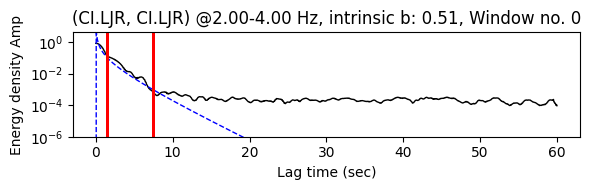

2024-09-27 12:25:42,089 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.52], mean_free: [0.2]
2024-09-27 12:25:42,102 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.52) -- scaling amp: 0.95


GET OPTIMAL
1e-06 4.018474948237908


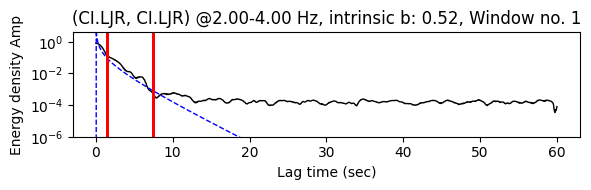

2024-09-27 12:25:42,283 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:42,295 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.54) -- scaling amp: 0.92


1e-06 3.967030124262148


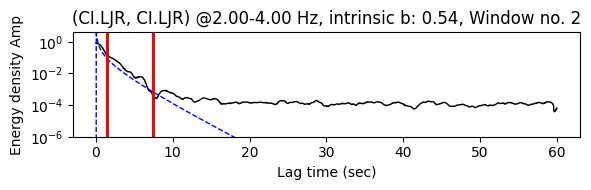

2024-09-27 12:25:42,381 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [0.2]
2024-09-27 12:25:42,394 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.54) -- scaling amp: 1.07


GET OPTIMAL
1e-06 3.9075735892731296


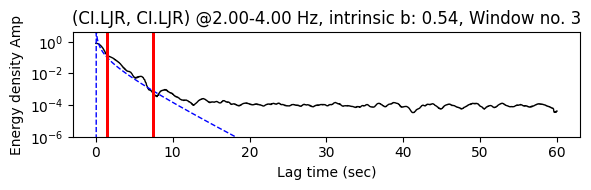

2024-09-27 12:25:42,480 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:42,493 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.55) -- scaling amp: 1.11


1e-06 3.7327766593232954


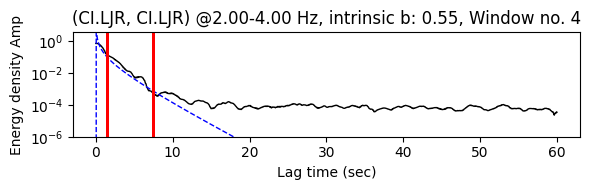

2024-09-27 12:25:42,580 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:42,593 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.57) -- scaling amp: 1.17


1e-06 3.623693495306024


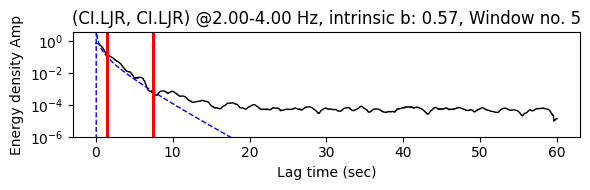

2024-09-27 12:25:42,680 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.58], mean_free: [0.2]
2024-09-27 12:25:42,692 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.58) -- scaling amp: 1.28


GET OPTIMAL
1e-06 3.6478878058949182


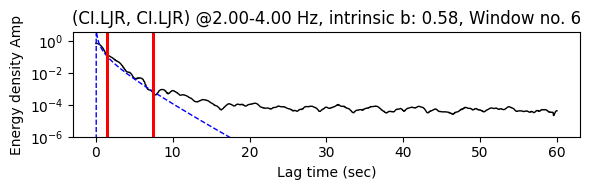

2024-09-27 12:25:42,778 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.59], mean_free: [0.2]
2024-09-27 12:25:42,791 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.59) -- scaling amp: 1.14


GET OPTIMAL
1e-06 3.714944911076646


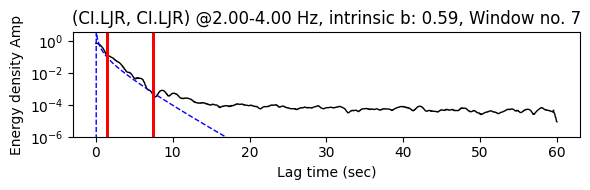

2024-09-27 12:25:42,877 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.58], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:42,890 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.58) -- scaling amp: 1.14


1e-06 3.81622117455675


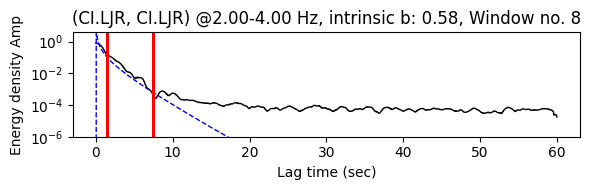

2024-09-27 12:25:42,976 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b 0.56, mean_free: 0.4


GET OPTIMAL


2024-09-27 12:25:42,989 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.4, 0.56) -- scaling amp: 2.36


1e-06 4.0094200821151995


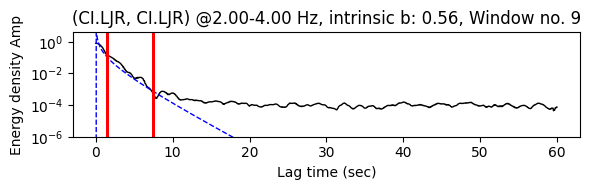

2024-09-27 12:25:43,074 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:43,087 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.56) -- scaling amp: 1.05


1e-06 4.03055549755164


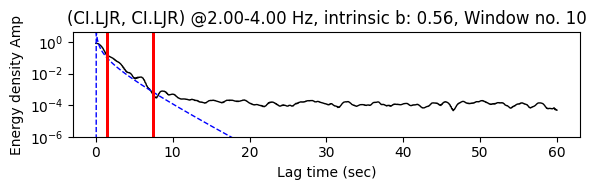

2024-09-27 12:25:43,174 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [0.4]
2024-09-27 12:25:43,187 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.4, 0.54) -- scaling amp: 2.03


GET OPTIMAL
1e-06 3.9749271111897966


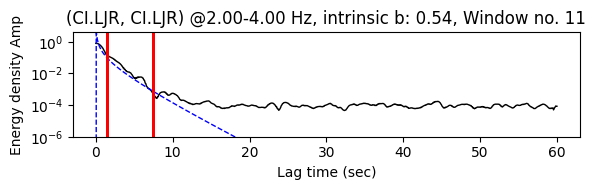

2024-09-27 12:25:43,276 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b 0.56, mean_free: 0.2
2024-09-27 12:25:43,289 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.56) -- scaling amp: 1.16


GET OPTIMAL
1e-06 4.004906731540797


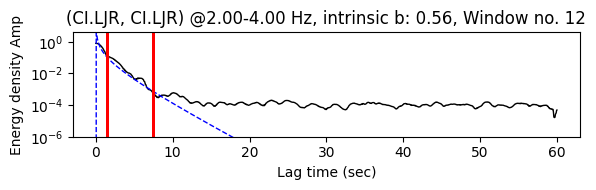

2024-09-27 12:25:43,375 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.59], mean_free: [0.2]
2024-09-27 12:25:43,387 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.59) -- scaling amp: 1.11


GET OPTIMAL
1e-06 4.026762698136107


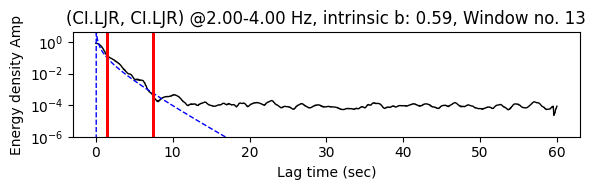

2024-09-27 12:25:43,474 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:43,487 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.55) -- scaling amp: 1.11


1e-06 4.046675625415478


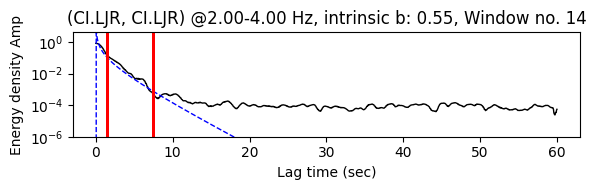

2024-09-27 12:25:43,573 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.51], mean_free: [1.]


GET OPTIMAL


2024-09-27 12:25:43,587 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.0, 0.51) -- scaling amp: 5.48


1e-06 3.893668398920313


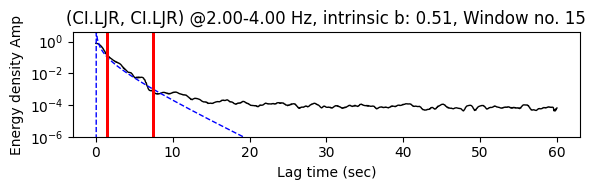

2024-09-27 12:25:43,674 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.52], mean_free: [0.8]


GET OPTIMAL


2024-09-27 12:25:43,687 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.8, 0.52) -- scaling amp: 4.40


1e-06 3.8583607828545268


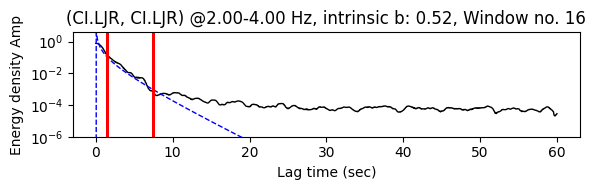

2024-09-27 12:25:43,773 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:43,785 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.55) -- scaling amp: 1.18


1e-06 3.7973193974519215


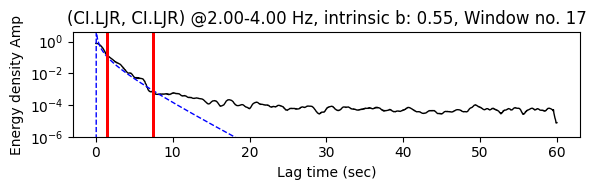

2024-09-27 12:25:43,871 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.33], mean_free: [1.8]


GET OPTIMAL


2024-09-27 12:25:43,884 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.8, 0.33) -- scaling amp: 14.89


1e-06 4.965951132104508


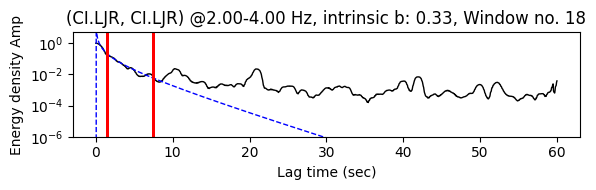

2024-09-27 12:25:43,970 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.01], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:43,982 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.01) -- scaling amp: 0.19


1e-06 4.200179189659762


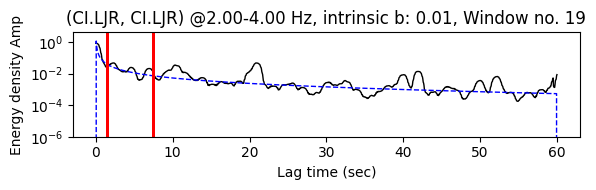

2024-09-27 12:25:44,068 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.33], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:44,081 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.33) -- scaling amp: 0.80


1e-06 3.944555370820365


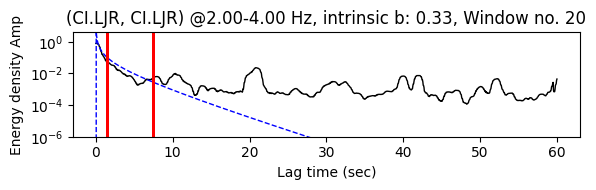

2024-09-27 12:25:44,167 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [1.8]


GET OPTIMAL


2024-09-27 12:25:44,180 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.8, 0.56) -- scaling amp: 21.26


1e-06 3.585575289499462


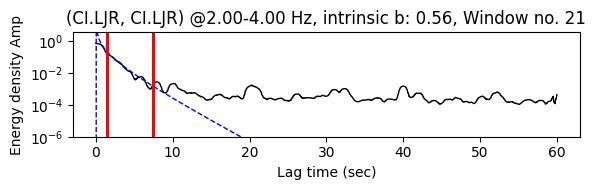

2024-09-27 12:25:44,267 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.58], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:44,280 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.58) -- scaling amp: 1.41


1e-06 4.0349577229700815


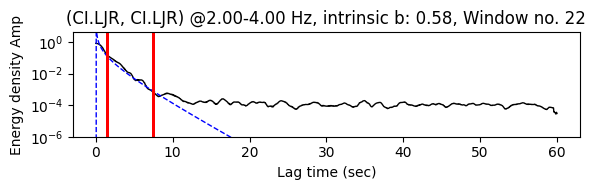

2024-09-27 12:25:44,365 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [1.8]
2024-09-27 12:25:44,378 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.8, 0.55) -- scaling amp: 12.06


GET OPTIMAL
1e-06 3.9758127684520845


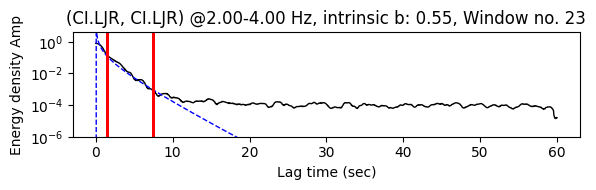

2024-09-27 12:25:44,464 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [0.2]
2024-09-27 12:25:44,477 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.54) -- scaling amp: 1.31


GET OPTIMAL
1e-06 3.9965477958930014


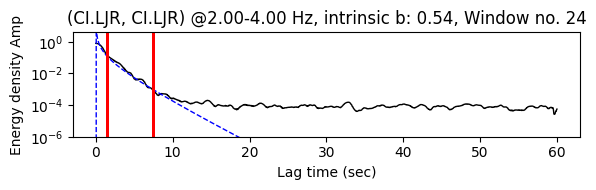

2024-09-27 12:25:44,563 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:44,576 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.54) -- scaling amp: 1.37


1e-06 4.0479741947746675


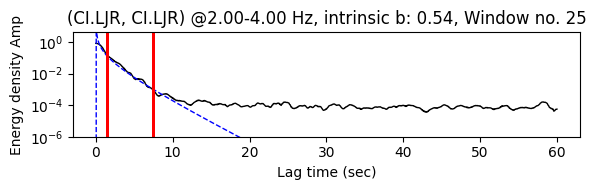

2024-09-27 12:25:44,662 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:44,674 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.55) -- scaling amp: 1.47


1e-06 3.9572416333220684


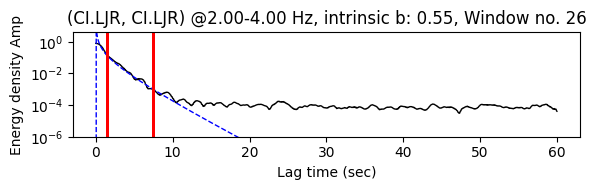

2024-09-27 12:25:44,914 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [1.2]
2024-09-27 12:25:44,927 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.2, 0.54) -- scaling amp: 8.46


GET OPTIMAL
1e-06 3.9070742115284514


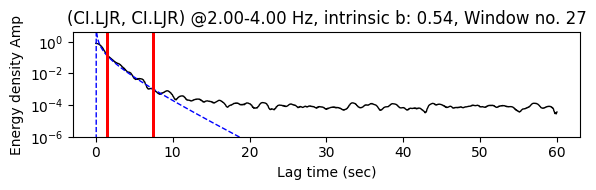

2024-09-27 12:25:45,013 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.53], mean_free: [1.8]
2024-09-27 12:25:45,025 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.8, 0.53) -- scaling amp: 11.23


GET OPTIMAL
1e-06 3.8342292611315774


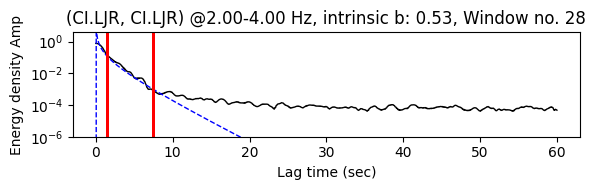

2024-09-27 12:25:45,110 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,122 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.56) -- scaling amp: 1.17


1e-06 3.7483667031749675


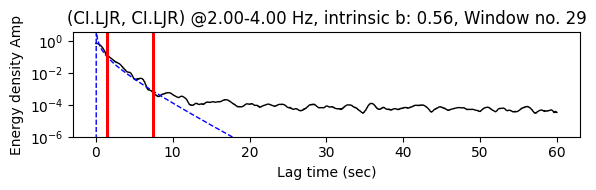

2024-09-27 12:25:45,208 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,221 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.57) -- scaling amp: 1.26


1e-06 3.6469836708618675


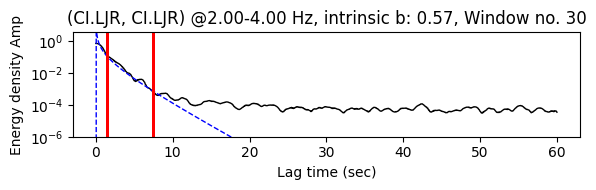

2024-09-27 12:25:45,310 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,322 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.56) -- scaling amp: 1.33


1e-06 3.5508337870533033


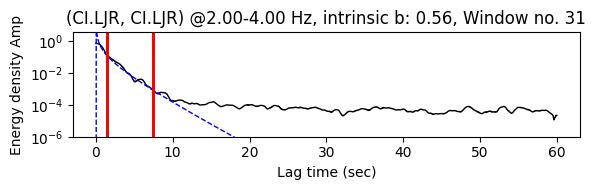

2024-09-27 12:25:45,407 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,420 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.57) -- scaling amp: 1.37


1e-06 3.7341458132516014


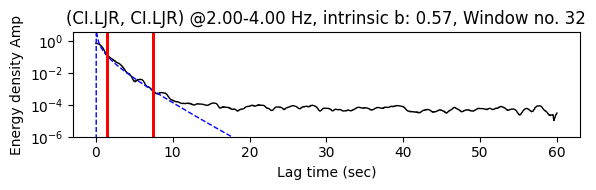

2024-09-27 12:25:45,505 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.59], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,517 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.59) -- scaling amp: 1.41


1e-06 3.992539739830664


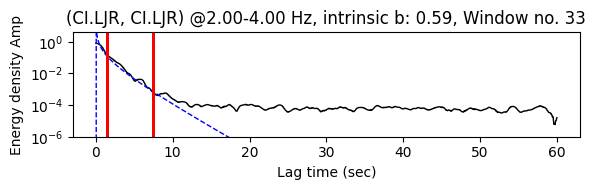

2024-09-27 12:25:45,602 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [0.2]
2024-09-27 12:25:45,614 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.57) -- scaling amp: 1.36


GET OPTIMAL
1e-06 3.993191276941256


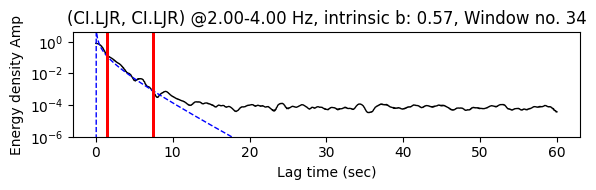

2024-09-27 12:25:45,700 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,713 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.57) -- scaling amp: 1.27


1e-06 3.897484397906801


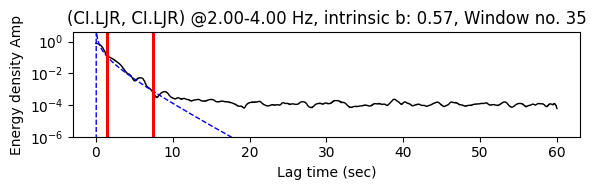

2024-09-27 12:25:45,797 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.59], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:45,810 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.59) -- scaling amp: 1.29


1e-06 3.8303908527506163


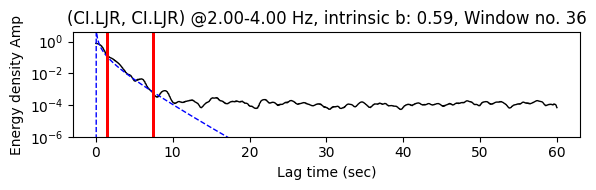

2024-09-27 12:25:45,895 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [1.4]


GET OPTIMAL


2024-09-27 12:25:45,907 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.4, 0.57) -- scaling amp: 9.07


1e-06 3.907318712477725


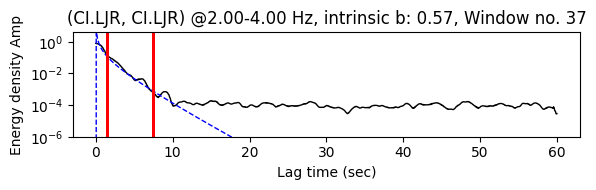

2024-09-27 12:25:45,995 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:46,007 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.55) -- scaling amp: 1.46


1e-06 3.9395454189492374


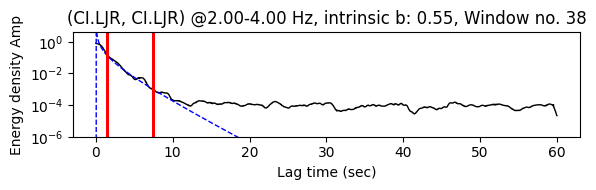

2024-09-27 12:25:46,092 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [1.2]


GET OPTIMAL


2024-09-27 12:25:46,105 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.2, 0.56) -- scaling amp: 9.49


1e-06 3.8531804692879157


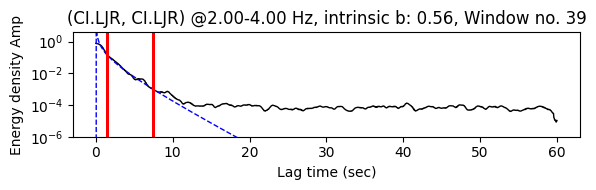

2024-09-27 12:25:46,190 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [0.6]


GET OPTIMAL


2024-09-27 12:25:46,202 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.6, 0.56) -- scaling amp: 4.78


1e-06 3.8744634520661485


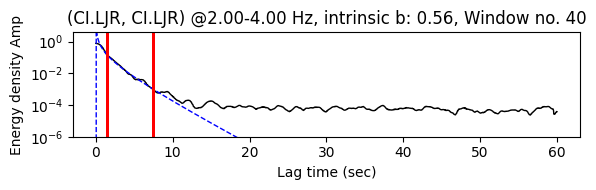

2024-09-27 12:25:46,288 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:46,300 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.54) -- scaling amp: 1.49


1e-06 3.969877699810419


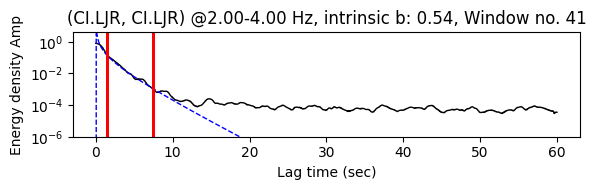

2024-09-27 12:25:46,385 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [2.]
2024-09-27 12:25:46,398 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(2.0, 0.54) -- scaling amp: 14.21


GET OPTIMAL
1e-06 3.8278999651999133


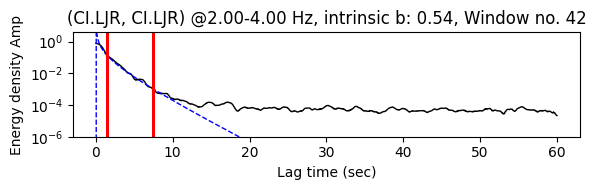

2024-09-27 12:25:46,484 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.4]


GET OPTIMAL


2024-09-27 12:25:46,497 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.4, 0.55) -- scaling amp: 2.72


1e-06 3.71888067495751


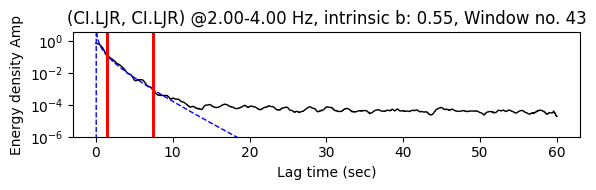

2024-09-27 12:25:46,584 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:46,597 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.55) -- scaling amp: 1.36


1e-06 3.833023695764618


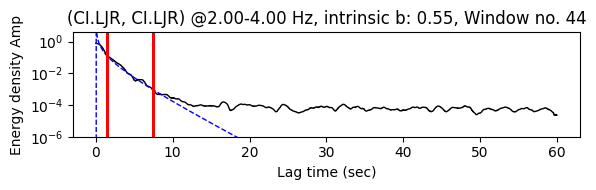

2024-09-27 12:25:46,682 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:46,695 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.56) -- scaling amp: 1.30


1e-06 3.8901913314930576


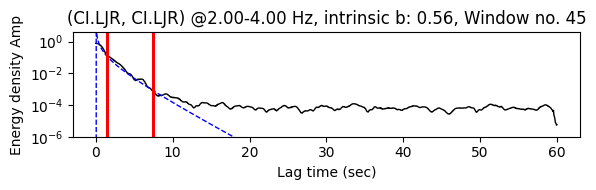

2024-09-27 12:25:46,782 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:46,795 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.56) -- scaling amp: 1.23


1e-06 3.995858851585422


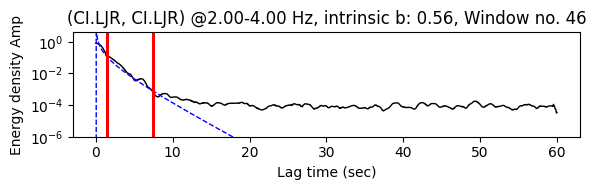

2024-09-27 12:25:46,881 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.59], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:46,894 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.59) -- scaling amp: 1.33


1e-06 3.92683533238455


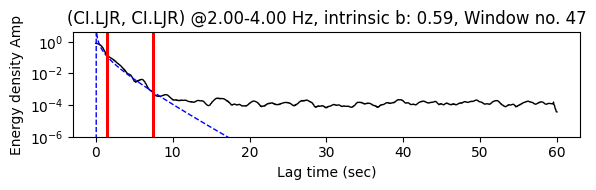

2024-09-27 12:25:46,980 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [1.6]


GET OPTIMAL


2024-09-27 12:25:46,993 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.6, 0.57) -- scaling amp: 9.83


1e-06 3.95121054724922


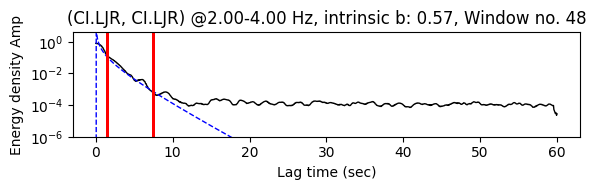

2024-09-27 12:25:47,080 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [0.2]


GET OPTIMAL


2024-09-27 12:25:47,093 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.57) -- scaling amp: 1.34


1e-06 4.014158395526323


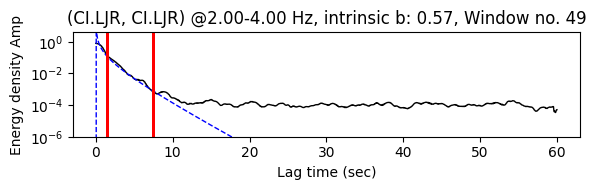

2024-09-27 12:25:47,179 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.55], mean_free: [0.8]


GET OPTIMAL


2024-09-27 12:25:47,192 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.8, 0.55) -- scaling amp: 5.24


1e-06 4.01726680576531


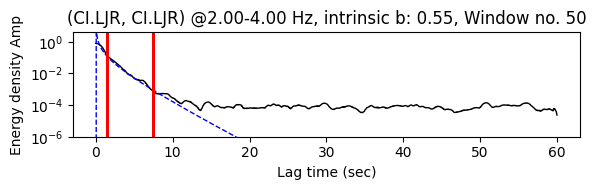

2024-09-27 12:25:47,277 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.53], mean_free: [0.4]


GET OPTIMAL


2024-09-27 12:25:47,291 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.4, 0.53) -- scaling amp: 2.58


1e-06 3.9539749699679456


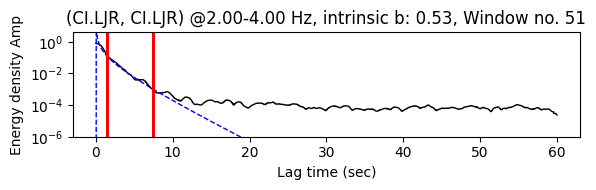

GET OPTIMAL


2024-09-27 12:25:47,379 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b 0.54, mean_free: 0.2
2024-09-27 12:25:47,392 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(0.2, 0.54) -- scaling amp: 1.29


1e-06 3.8029647552835293


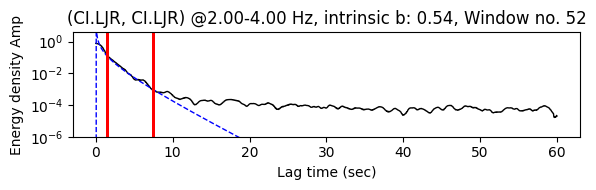

2024-09-27 12:25:47,477 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b 0.53, mean_free: 1.4000000000000001
2024-09-27 12:25:47,489 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.4, 0.53) -- scaling amp: 8.67


GET OPTIMAL
1e-06 3.8080068095088566


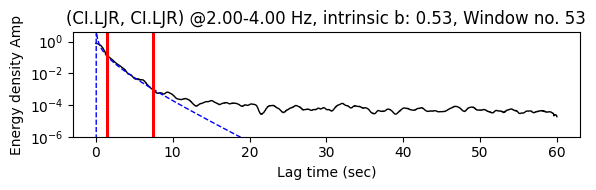

2024-09-27 12:25:47,750 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b 0.55, mean_free: 1.2
2024-09-27 12:25:47,762 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.2, 0.55) -- scaling amp: 7.98


GET OPTIMAL
1e-06 3.730279445596754


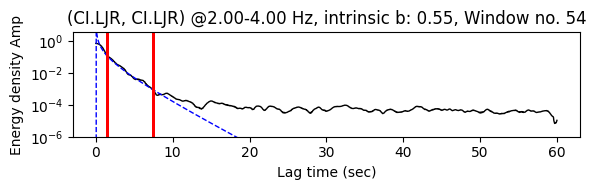

2024-09-27 12:25:47,848 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.56], mean_free: [1.4]
2024-09-27 12:25:47,860 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.4, 0.56) -- scaling amp: 10.00


GET OPTIMAL
1e-06 3.6913939257612283


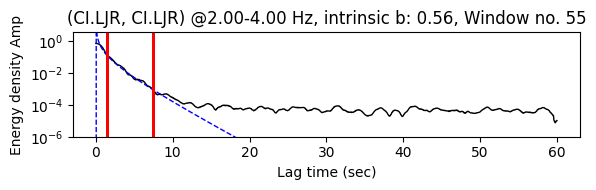

2024-09-27 12:25:47,947 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [1.8]


GET OPTIMAL


2024-09-27 12:25:47,960 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.8, 0.57) -- scaling amp: 13.49


1e-06 3.872111621474998


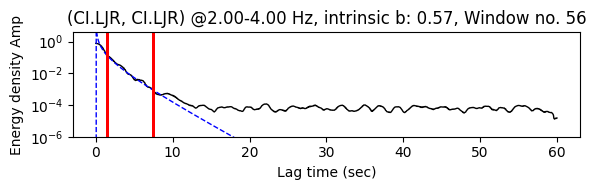

2024-09-27 12:25:48,046 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.57], mean_free: [2.]


GET OPTIMAL


2024-09-27 12:25:48,059 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(2.0, 0.57) -- scaling amp: 15.16


1e-06 4.078799727966849


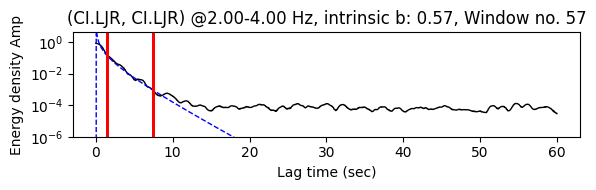

2024-09-27 12:25:48,145 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.54], mean_free: [2.]


GET OPTIMAL


2024-09-27 12:25:48,158 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(2.0, 0.54) -- scaling amp: 14.62


1e-06 4.101408310714822


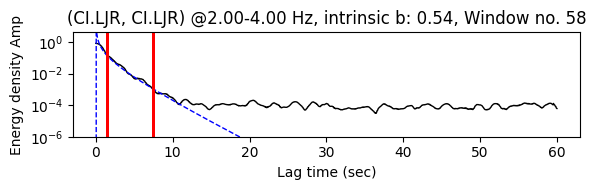

2024-09-27 12:25:48,244 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.53], mean_free: [1.2]


GET OPTIMAL


2024-09-27 12:25:48,257 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.2, 0.53) -- scaling amp: 8.11


1e-06 4.1839890733379


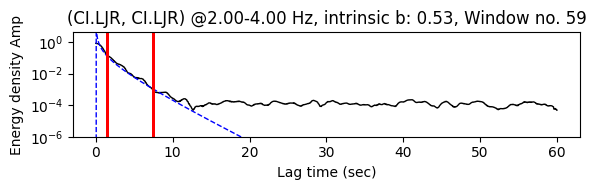

2024-09-27 12:25:48,342 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.53], mean_free: [1.2]


GET OPTIMAL


2024-09-27 12:25:48,354 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.2, 0.53) -- scaling amp: 7.39


1e-06 4.090175572519824


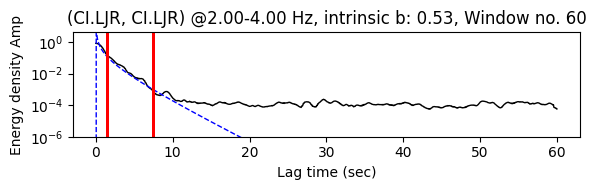

2024-09-27 12:25:48,440 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.53], mean_free: [1.2]


GET OPTIMAL


2024-09-27 12:25:48,452 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.2, 0.53) -- scaling amp: 7.24


1e-06 3.9662366061443475


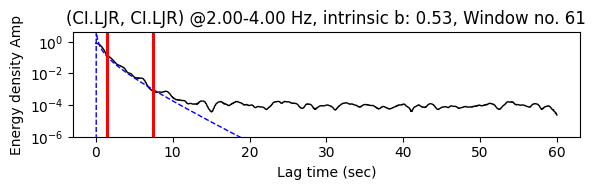

2024-09-27 12:25:48,538 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.51], mean_free: [2.]


GET OPTIMAL


2024-09-27 12:25:48,551 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(2.0, 0.51) -- scaling amp: 12.48


1e-06 3.9889807000033715


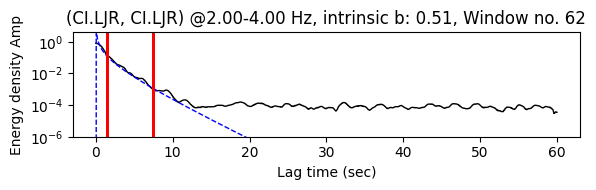

2024-09-27 12:25:48,638 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.5], mean_free: [1.8]


GET OPTIMAL


2024-09-27 12:25:48,651 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(1.8, 0.50) -- scaling amp: 11.84


1e-06 3.9872410278287473


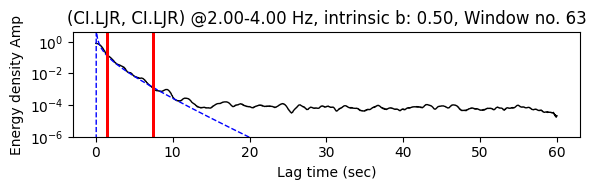

2024-09-27 12:25:48,737 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): Station Pair: (CI.LJR, CI.LJR), intrinsic_b [0.5], mean_free: [2.]


GET OPTIMAL


2024-09-27 12:25:48,750 140570128308032 INFO attenuation_utils_mulwin.get_optimal_Esyn(): nwindow 0, pair 0, (mfp, intb)=(2.0, 0.50) -- scaling amp: 13.30


1e-06 3.940248380504169


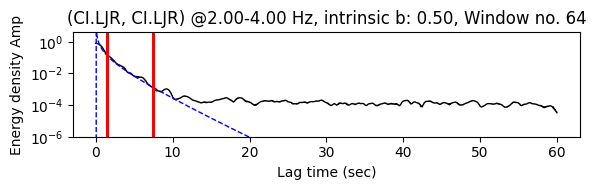

In [41]:
# getting the optimal value from the SSR
result_intb=np.zeros((nwin))
result_mfp=np.zeros((nwin))

Eobs=np.ndarray((fnum, nwin, nwindows, half_npts+1))
Esyn=np.ndarray((fnum, nwin, nwindows, half_npts+1))
scaling_amp=np.ndarray((nwin,nwindows))

fmin=freq1
fmax=freq2
wfcen=2.0*np.pi*((freq1+freq2)/2.0)

for ntw in range(nwin):
    
    fmsv_mean_single = np.zeros((fnum, half_npts+1))
    fmsv_mean_single[0] = fmsv_mean[ntw,1,:]

    # parameters for getting the sum of squared residuals (SSR) between Eobs and Esyn 
    para={ 'fmin':fmin, 'fmax':fmax, 'vdist':vdist, 'npts':npts_one_segmt, 'dt':dt, 'cvel':cvel,  \
            'mfp':mfpx, 'intb':intby, 'twin':coda_single_band, 'fmsv':fmsv_mean_single, \
            'SSR':SSR[ntw] , 'sta':sta_pair }
    # call function get_SSR
    #SSR_final, mfpx, intby = get_optimal_Esyn(para)
    result_intb[ntw], result_mfp[ntw], Eobs[fnum-1, ntw], Esyn[fnum-1, ntw], scaling_amp[ntw] = get_optimal_Esyn(para)
    
    # plotting fitting results
    #if ntw == 32:
    plot_fitting_result(result_mfp[ntw],result_intb[ntw],fmsv_mean[ntw,0,:],Eobs[fnum-1, ntw],Esyn[fnum-1, ntw],
                        sta_pair,vdist,coda_single_band[fnum-1],fmin,fmax,ntw)  

intQ=np.zeros((nwin)) 
intQ=wfcen/result_intb


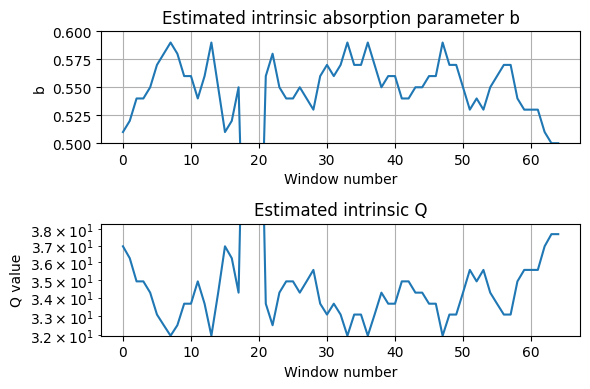

In [52]:
fig,ax=plt.subplots(2,1,figsize=(6,4))
ax[0].plot(result_intb, label='intrinsic b')
ax[0].grid(True)
ax[0].set_title('Estimated intrinsic absorption parameter b')
ax[0].set_xlabel('Window number')
ax[0].set_ylabel('b')
ax[0].set_ylim(np.percentile(result_intb,5),np.percentile(result_intb,5)*1.2)

ax[1].plot(intQ, label='Q')
ax[1].set_yscale("log")
ax[1].grid(True)
ax[1].set_title('Estimated intrinsic Q')
ax[1].set_xlabel('Window number')
ax[1].set_ylabel('Q value')
ax[1].set_ylim(np.percentile(intQ,1),np.percentile(intQ,1)*1.2)
plt.tight_layout()

### Step : Output results as a csv file

In [53]:
# Restore calendar time from cc_time array 
#cal_time=win_time[:nwin]
cal_time=win_time[:len(win_time)//3]
print(len(cal_time),results_dvv.shape,result_intb[:].shape, intQ.shape )


65 (65,) (65,) (65,)


In [54]:
from datetime import datetime

midpoint = np.zeros(nev, dtype=datetime)
for iev in range(nev):
    #print(timespans[iev], type(timespans[iev]))

    start_datetime = timespans[iev].start_datetime
    end_datetime = timespans[iev].end_datetime

    # Calculate the midpoint
    midpoint[iev] = start_datetime + (end_datetime - start_datetime) / 2
    

In [56]:
import pandas as pd

fieldnames = ['time', 'dvv','err','int_b','wfcen', 'Q']
fcsv="Monitoring_output.csv"
data={
'time': midpoint,
'dvv':  results_dvv,
'err':  results_err,
'int_b': result_intb[:],
'wfcen': np.full((nwin),wfcen),
'Q': intQ[:],
}

df=pd.DataFrame(data)
df.to_csv(fcsv,columns=fieldnames,sep=',',index = None, header=True, float_format="%.4f" )

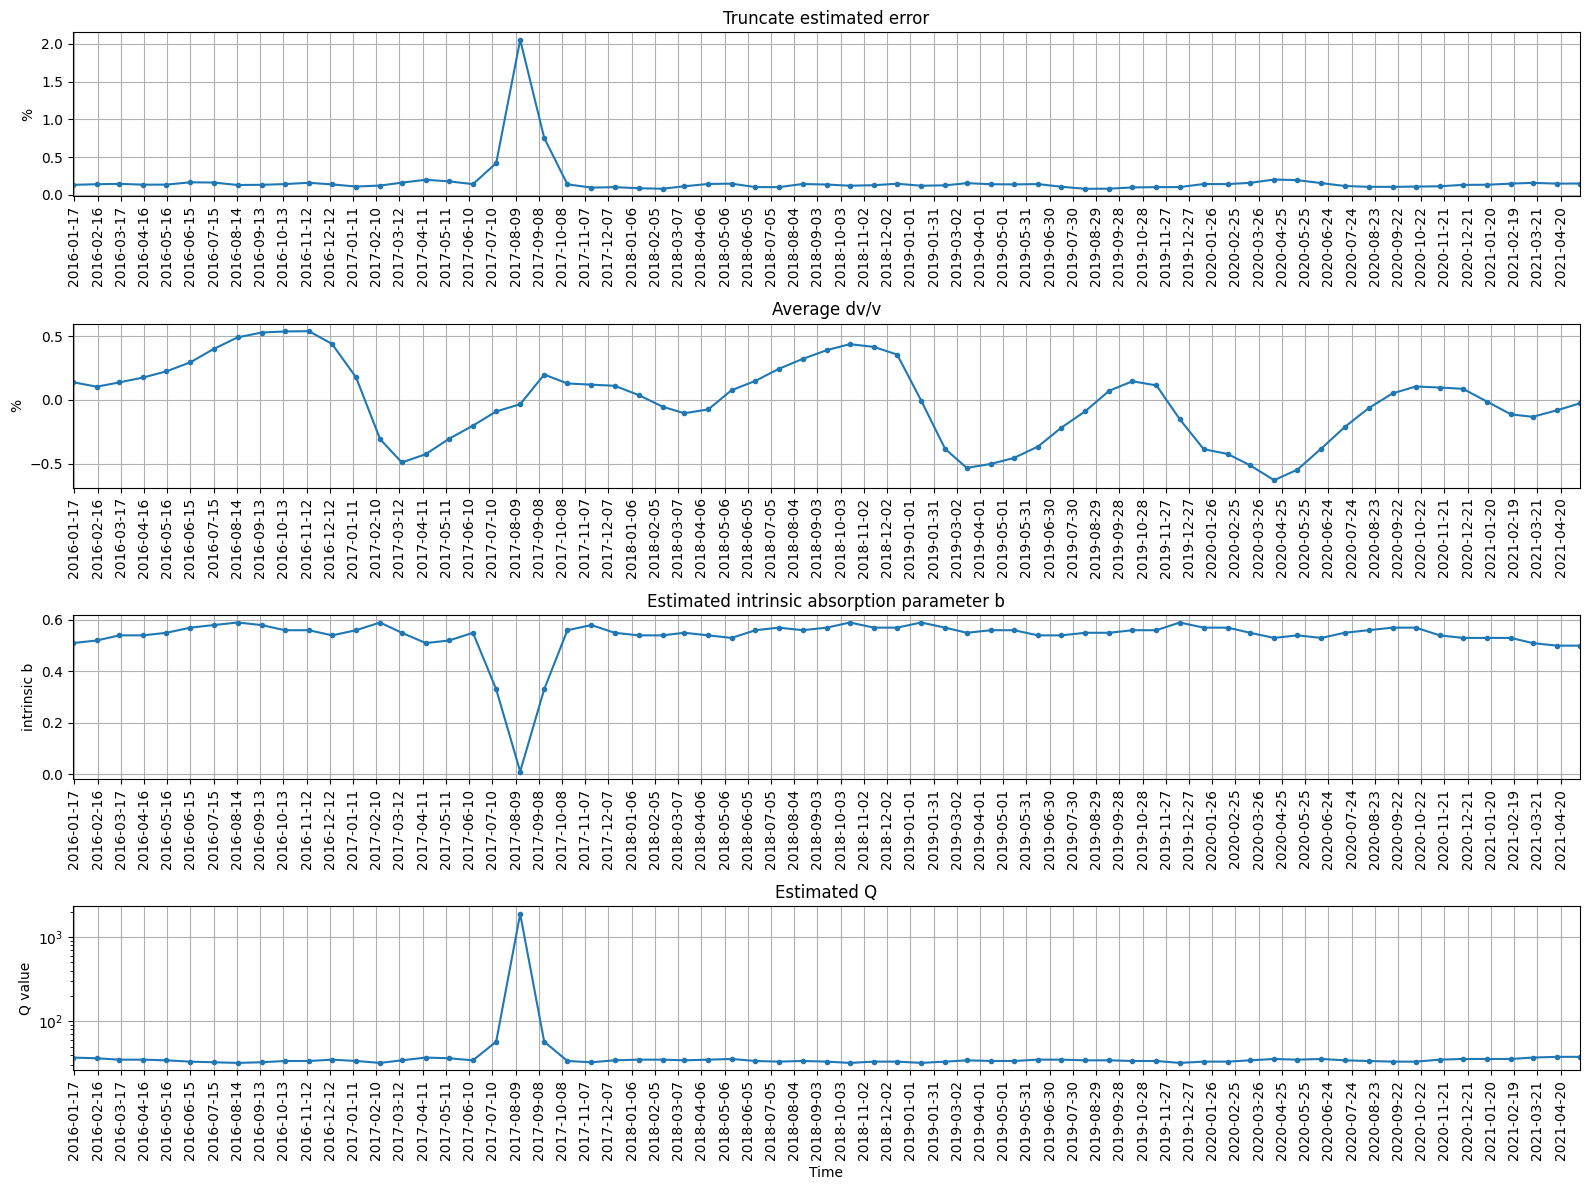

In [57]:
import matplotlib.dates as mdates

fig,ax=plt.subplots(4,1,figsize=(16,12))

#t=[ timespans[d] for d in cal_time]
t=midpoint


ax[0].plot_date(t, results_err, '.-', label='error of dv/v (%)')
ax[0].set_title('Truncate estimated error')
ax[0].set_ylabel('%')

ax[1].plot_date(t, results_dvv, '.-', label='dv/v (%)')
ax[1].set_title('Average dv/v')
ax[1].set_ylabel('%')

ax[2].plot_date(t, result_intb[:], '.-', label='intrinsic b')
ax[2].set_title('Estimated intrinsic absorption parameter b')
ax[2].set_ylabel('intrinsic b')

ax[3].plot_date(t,intQ[:],'.-',  label='Q')
ax[3].set_title('Estimated Q')
ax[3].set_ylabel('Q value')
ax[3].set_xlabel('Time')
ax[3].set_yscale('log')
for k in range(4):
    ax[k].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[k].set_xlim(np.datetime64(t[0]), np.datetime64(t[-1]))
    ax[k].xaxis.set_major_locator(mdates.DayLocator(interval=30))
    ax[k].tick_params('x',labelrotation=90)
    ax[k].grid(True)

plt.tight_layout()

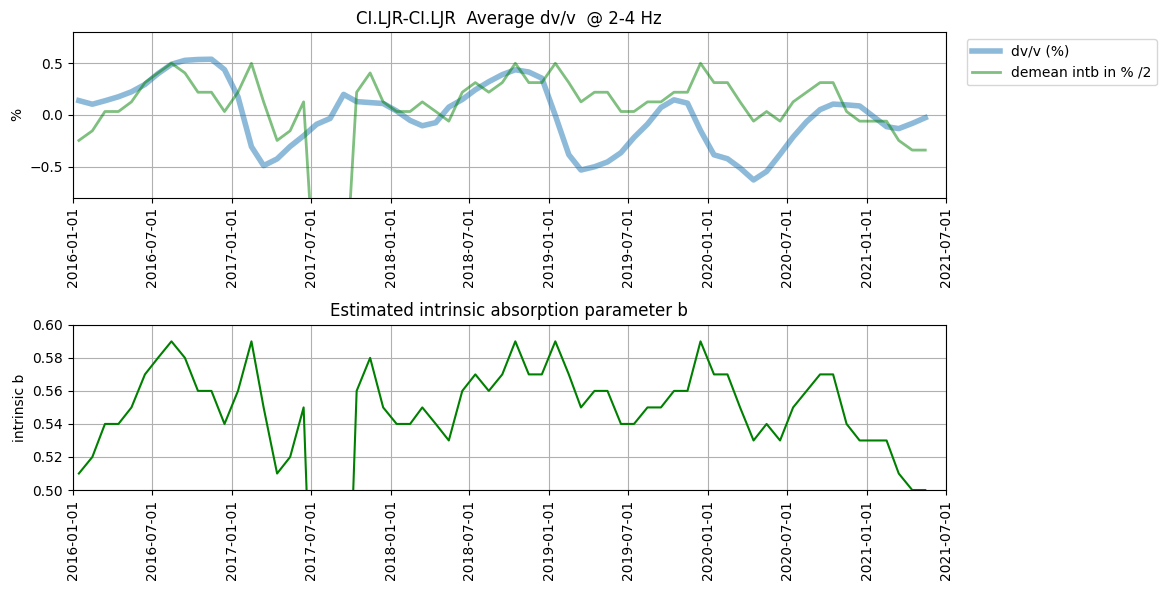

In [61]:
import matplotlib.dates as mdates

fig,ax=plt.subplots(2,1,figsize=(12,6))

demeanQ=np.zeros((nwin,1))
demeanQ=(intQ[:]-np.mean(intQ[:]))
demeanQ=demeanQ/np.max(demeanQ)
 
demeanB=np.zeros((nwin,1))
demeanB=(result_intb[:]-np.mean(result_intb[:]))
demeanB=demeanB/np.max(demeanB)


ax[0].plot_date(t, results_dvv, '-', lw=4, alpha=0.5, label=f'dv/v (%)')
ax[0].set_title(f'{src}-{rec}  Average dv/v  @ {fmin}-{fmax} Hz')
ax[0].set_ylabel('%')
ax[0].set_ylim(-0.8,0.8)
#ax[0].plot_date(t, demeanQ*2, '-', alpha=0.5,  label='demean intQ in % *2')
ax[0].plot_date(t, demeanB/2, '-', alpha=0.5, lw=2, color='green', label='demean intb in % /2')
ax[0].legend(loc='upper right', bbox_to_anchor=(1.25,1))

ax[1].plot_date(t, result_intb[:], '-', color='green', label='intrinsic b')
ax[1].set_title('Estimated intrinsic absorption parameter b')
ax[1].set_ylabel('intrinsic b')
ax[1].set_ylim(np.percentile(result_intb,5),np.percentile(result_intb,5)*1.2)

specific_months = pd.date_range(start='2016-01-01', end='2021-12-31', freq='6MS')

for k in range(2):
    ax[k].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[k].set_xlim(np.datetime64(t[0]), np.datetime64(t[-1]))
    ax[k].xaxis.set_major_locator(mdates.YearLocator(base=1))
    ax[k].set_xticks(specific_months)
    ax[k].tick_params('x',labelrotation=90)
    ax[k].grid(True)


plt.tight_layout()